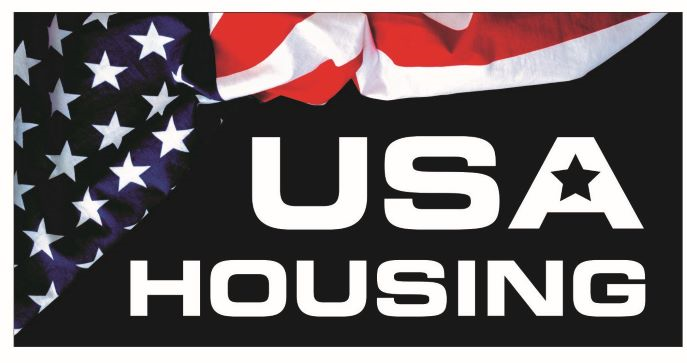

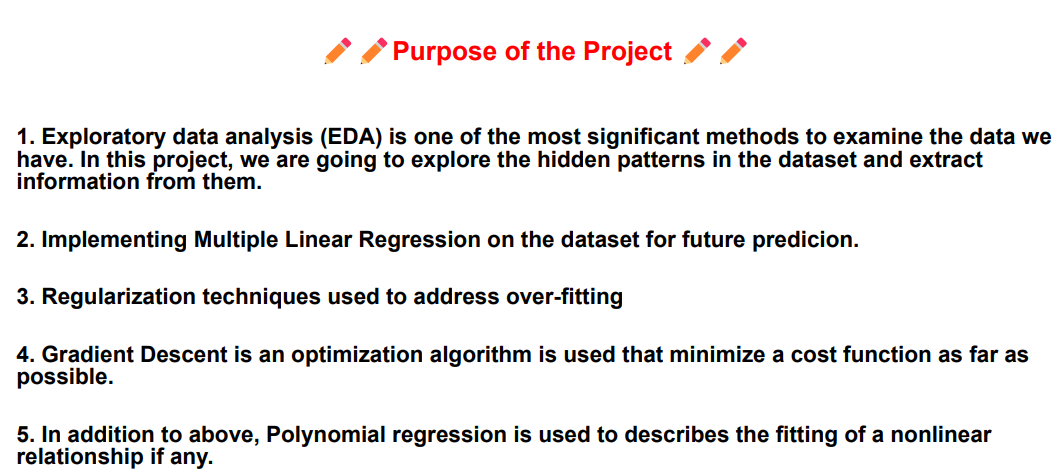

# Linear Regression Model

- In linear regression, the linearity assumption states that there is a linear relationship between the independent variables (also known as predictors or features) and the dependent variable (also known as the target or response variable). This assumption implies that the relationship between the independent variables and the dependent variable can be described by a straight line.

- Multiple regression suffers from multicollinearity, auto correlation, heteroskedasticity.Linear Regression is very sensitive to Outliers. It can terribly affect the regression line and eventually the forecasted values.

### Types

 1.SIMPLE LINEAR REGRESSION MODEL : Linear regression model that involves only one independent variable and one dependent variable

- Equation Y = MX+C (M=Slope,C=Intercept)

2.MULTIPLE LINEAR REGRESSION MODEL : Linear regression model that involves more than one independent variables
and one dependent variable

- Equation Y = M1X1+M2X2+M3X3+............+MnXn+C (M1,M2,M3......=Slopes or Co-efficients,C=Intercept)

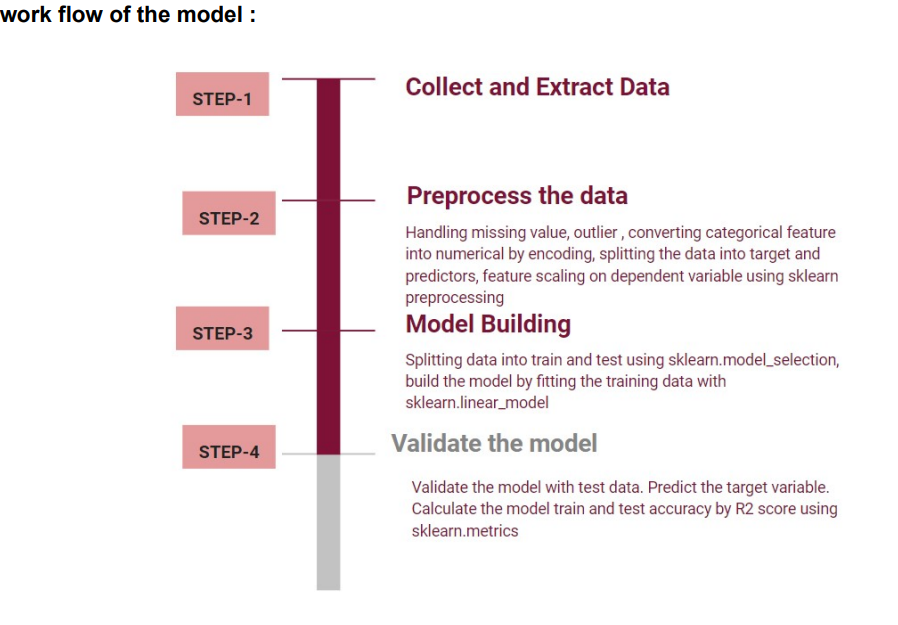

## About DataSet

1.Here we need to predict 'Price of the Houses in USA' 

2.The different features that influences Price are given in the dataset:

  - Avg. Area Income
  - Avg. Area House Age
  - Avg. Area Number of Rooms
  - Avg. Area Number of Bedrooms
  - Area Population
  - Address

### Importing necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing DataSet

In [2]:
usa_df = pd.read_csv('USA_Housing.csv')

In [3]:
usa_df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09      23086.80050  1.059034e+06   
1                             3.09      40173.07217  1.505891e+06   
2                             5.13      36882.15940  1.058988e+06   
3                             3.26      34310.24283  1.260617e+06   
4                             4.23      26354.10947  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46      22837.36103  1.060194e+06   
4996                          4.02      25616.11549  1.482618e+06   
4997                          2.13      33266.14549  1.030730e+06   
4998                          5.44      42625.62016  1.198657e+06   
4999                          4.07      46501.28380  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                             USS Barnett\nFPO AP 44820  
4                            USNS Raymond\nFPO AE 09386  
...                                                 ...  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]

## To find the information about the data set 

In [4]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


- Total there are 6 independent variables (5 are of dtype float, 1 is of dtype object)
- 1 dependent variable is of type float 
- out of 7, 3 columns are having missing data

### Descriptive statistics(Univariate analysis)

In [5]:
usa_df.describe().T

count          mean            std  \
Avg. Area Income              4990.0  6.858472e+04   10651.192423   
Avg. Area House Age           5000.0  5.977222e+00       0.991456   
Avg. Area Number of Rooms     4995.0  6.987693e+00       1.005938   
Avg. Area Number of Bedrooms  4994.0  3.981874e+00       1.234497   
Area Population               5000.0  3.616352e+04    9925.650114   
Price                         5000.0  1.232073e+06  353117.626584   

                                       min            25%           50%  \
Avg. Area Income              17796.631190   61481.465105  6.879767e+04   
Avg. Area House Age               2.644304       5.322283  5.970429e+00   
Avg. Area Number of Rooms         3.236194       6.299156  7.002940e+00   
Avg. Area Number of Bedrooms      2.000000       3.140000  4.050000e+00   
Area Population                 172.610686   29403.928700  3.619941e+04   
Price                         15938.657920  997577.135075  1.232669e+06   

                                       75%           max  
Avg. Area Income              7.577915e+04  1.077017e+05  
Avg. Area House Age           6.650808e+00  9.519088e+00  
Avg. Area Number of Rooms     7.665622e+00  1.075959e+01  
Avg. Area Number of Bedrooms  4.490000e+00  6.500000e+00  
Area Population               4.286129e+04  6.962171e+04  
Price                         1.471210e+06  2.469066e+06

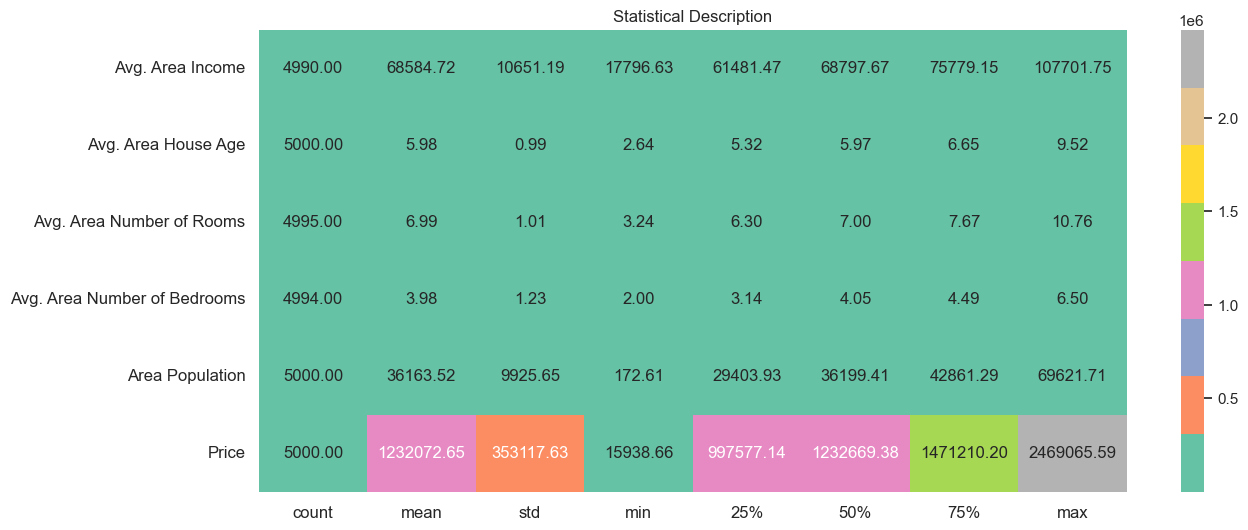

In [6]:
def descriptive_stats(usa_df):
    desc = usa_df.describe().round(2).T
    desc_df = pd.DataFrame(index=usa_df.columns,columns=desc.columns,data=desc) 
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()
descriptive_stats(usa_df)

## Bivariate Analysis

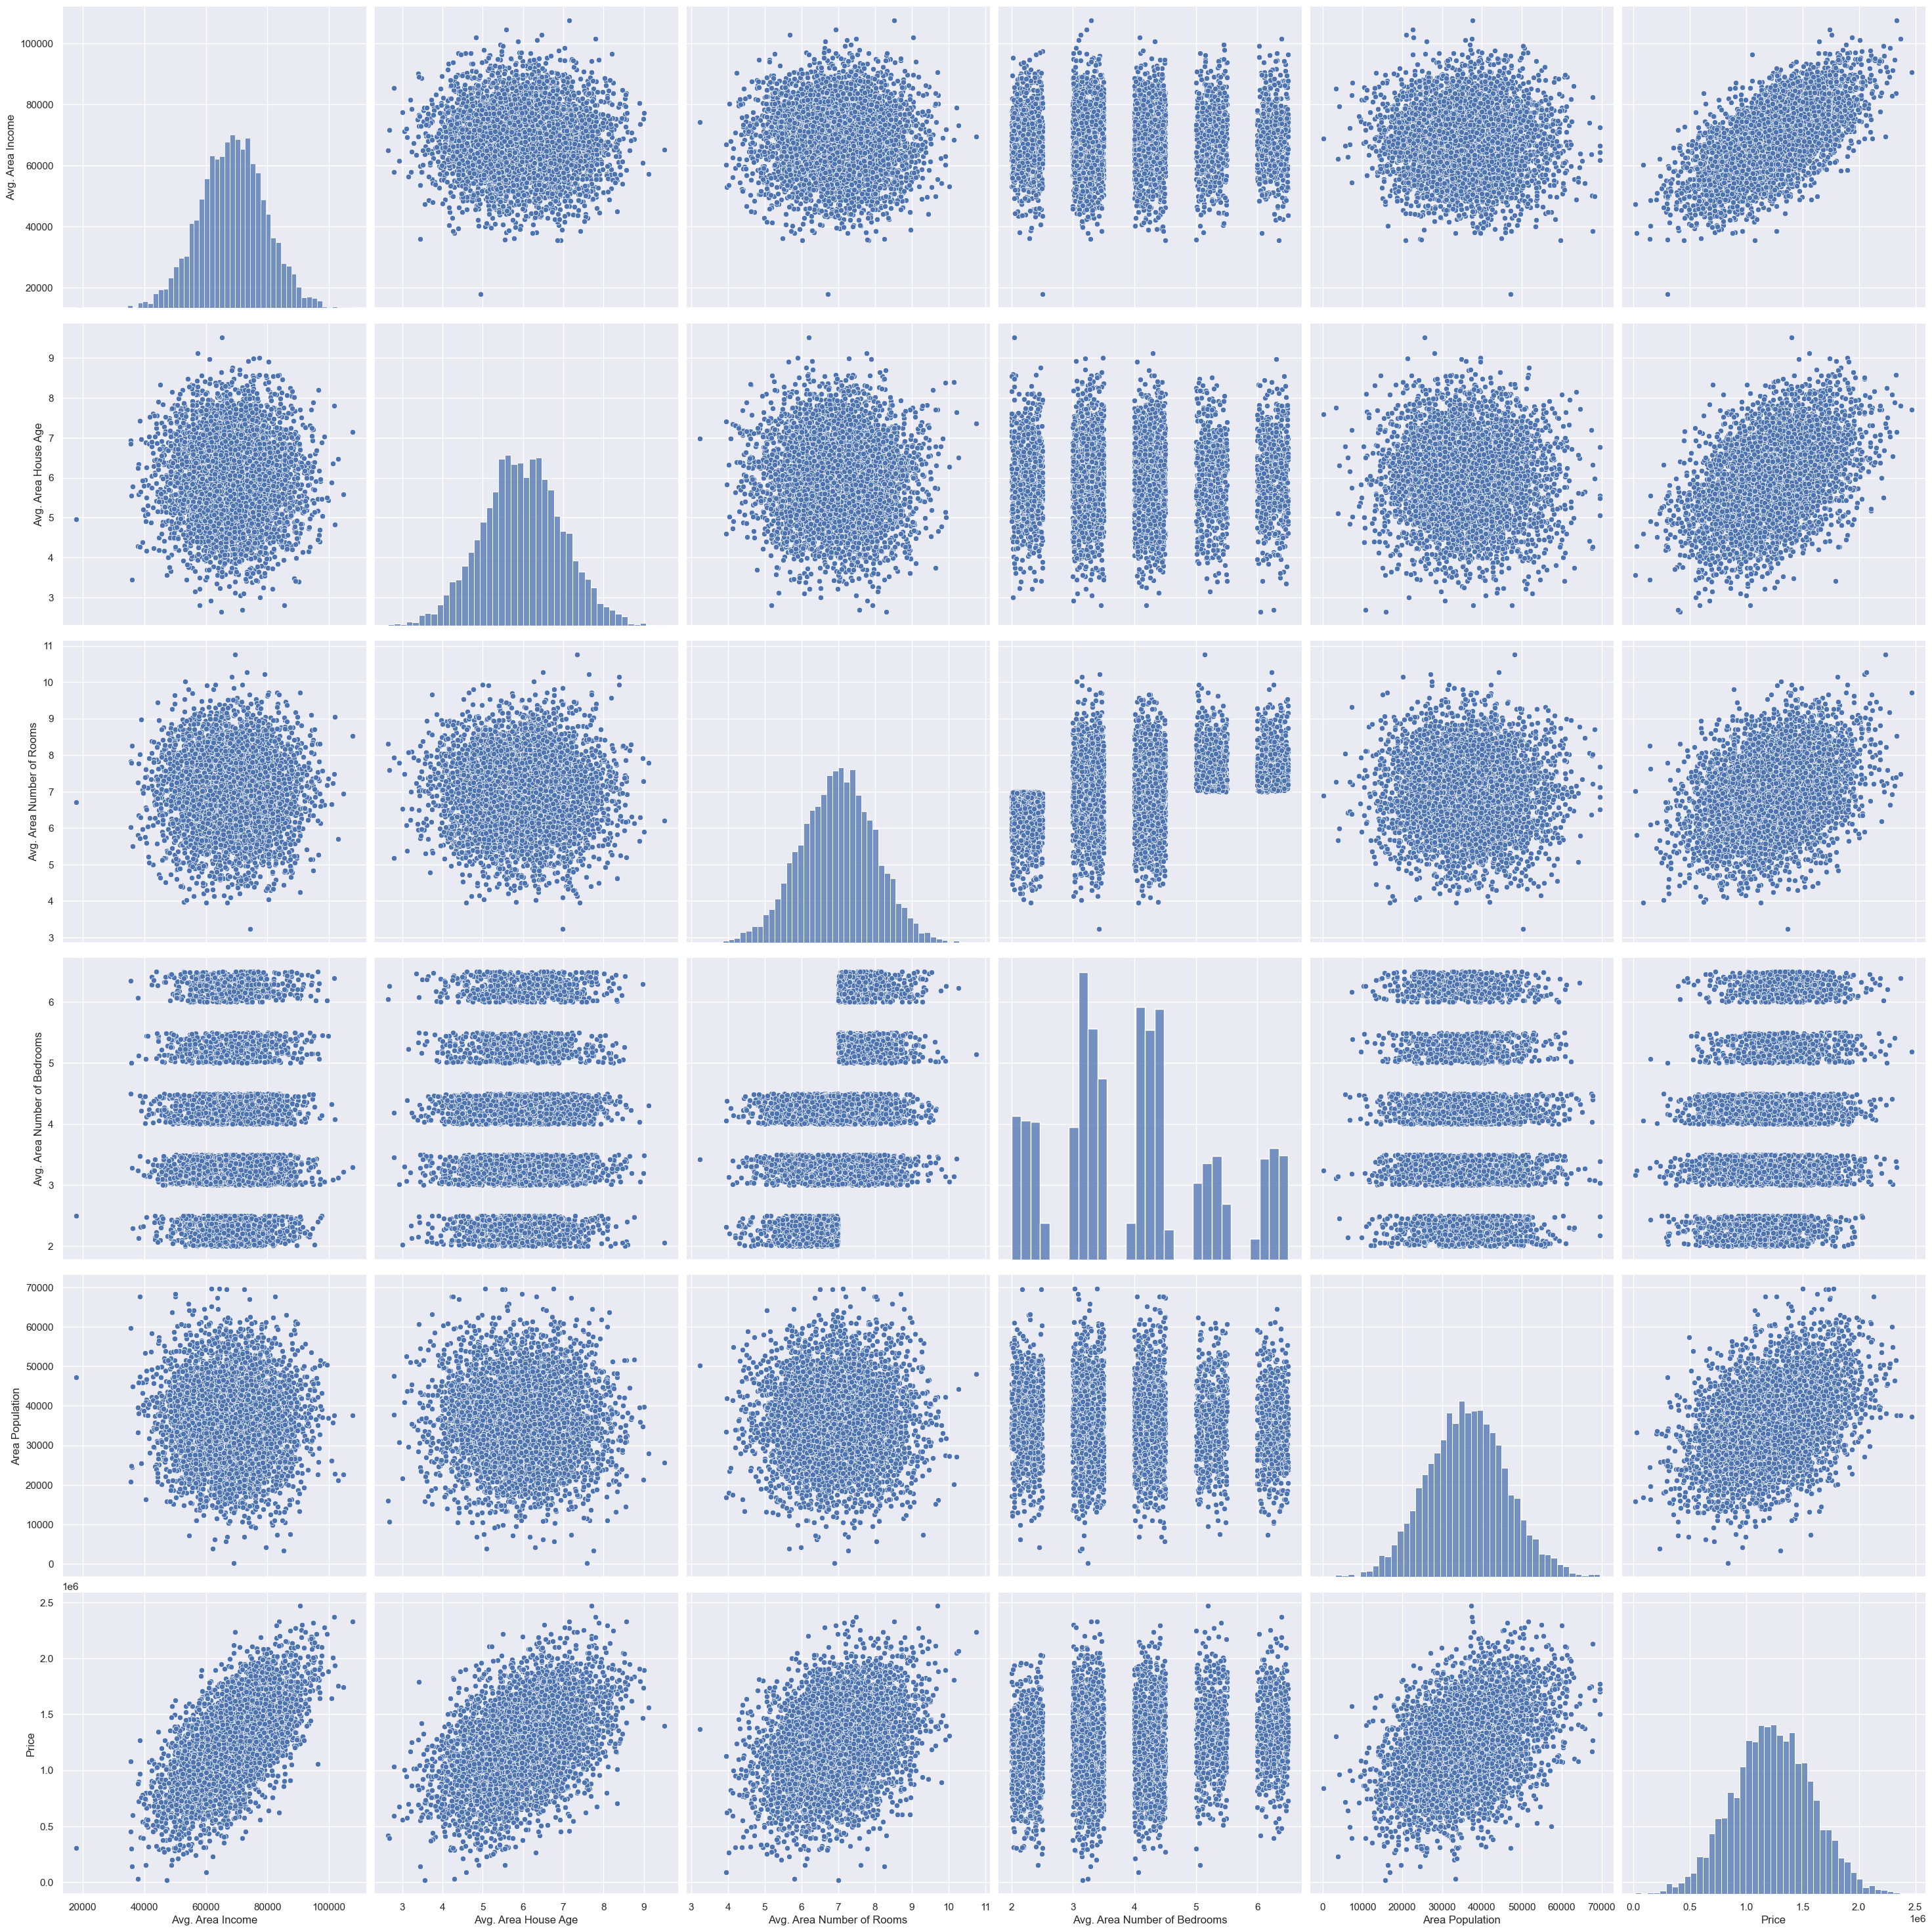

In [7]:
sns.pairplot(usa_df, size = 5, kind = 'scatter')

### Checking null values

In [8]:
usa_df.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

##### In percentage

In [9]:
usa_df.isnull().sum()/len(usa_df)*100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

- From the above analysis no column have misssing data more than 25%
- So, don't drop any columns
- Handle missing values by imputation method 

# Data PreProcessing📈📊📉

### Handling numerical object dtypes

#### Checking outliers

In [10]:
missing = ['Avg. Area Income','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms']

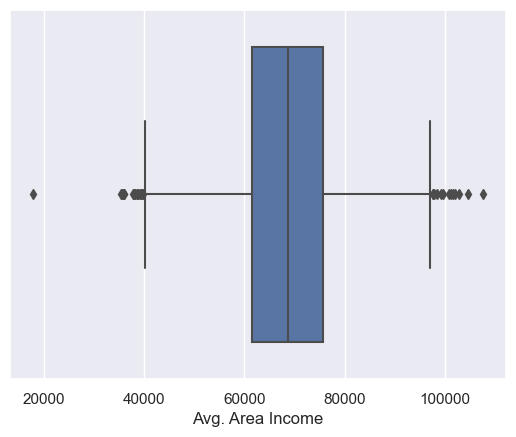

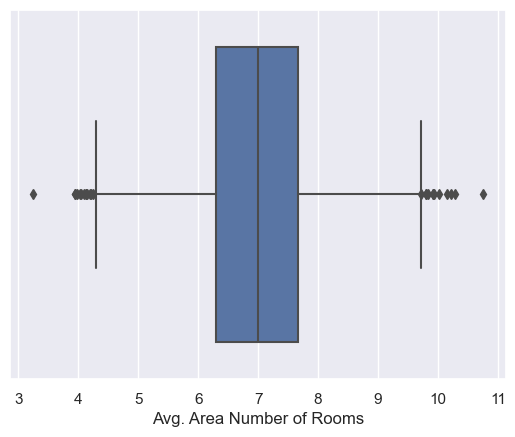

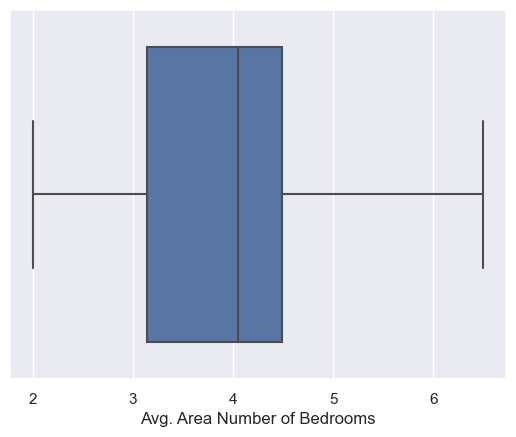

In [11]:
def boxplots(column):
    sns.boxplot(usa_df[column])
    plt.show()
    
for i in missing:
    boxplots(i)

- from above boxplots [Avg. Area Income,Avg. Area Number of Rooms] have outliers.fill the missing values with Median and [Avg. Area Number of Bedrooms] do not have outliers.fill the missing values with mean.

In [12]:
usa_df['Avg. Area Income']=usa_df['Avg. Area Income'].fillna(usa_df['Avg. Area Income'].median())

In [13]:
usa_df['Avg. Area Number of Rooms']=usa_df['Avg. Area Number of Rooms'].fillna(usa_df['Avg. Area Number of Rooms'].median())

In [14]:
usa_df['Avg. Area Number of Bedrooms']=usa_df['Avg. Area Number of Bedrooms'].fillna(usa_df['Avg. Area Number of Bedrooms'].mean())

In [15]:
usa_df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

- Handled all the missing values 

# Encoding 

- Checking no.of unique values in address columns

In [16]:
usa_df['Address'].nunique()

5000

- As there are 5000 unique values that's a big number.we'll go with 'label encoding'
- check significant relationship between address and price 

### Label encoding:

In [17]:
usa_df['Address'] = usa_df['Address'].astype('category')
usa_df['Address'] = usa_df['Address'].cat.codes

In [18]:
usa_df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  Address  
0                             4.09      23086.80050  1.059034e+06      962  
1                             3.09      40173.07217  1.505891e+06      863  
2                             5.13      36882.15940  1.058988e+06     4069  
3                             3.26      34310.24283  1.260617e+06     4794  
4                             4.23      26354.10947  6.309435e+05     4736  
...                            ...              ...           ...      ...  
4995                          3.46      22837.36103  1.060194e+06     4750  
4996                          4.02      25616.11549  1.482618e+06     4636  
4997                          2.13      33266.14549  1.030730e+06     1897  
4998                          5.44      42625.62016  1.198657e+06     4833  
4999                          4.07      46501.28380  1.298950e+06     1703  

[5000 rows x 7 columns]

# ANOVA TESTING 

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Address ~ Price', data=usa_df).fit()
anova_result = sm.stats.anova_lm(model,typ=2)
print(anova_result)

                sum_sq      df         F    PR(>F)
Price     7.902884e+05     1.0  0.379215  0.538051
Residual  1.041588e+10  4998.0       NaN       NaN


- as p value of address is >0.05.hence no significant relationship between address and price
- So, drop the Address

In [20]:
usa_df.drop('Address',axis=1,inplace=True)

In [21]:
usa_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [22]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [23]:
x=usa_df.drop(['Price'],axis=1)

In [24]:
x

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09      23086.80050  
1                             3.09      40173.07217  
2                             5.13      36882.15940  
3                             3.26      34310.24283  
4                             4.23      26354.10947  
...                            ...              ...  
4995                          3.46      22837.36103  
4996                          4.02      25616.11549  
4997                          2.13      33266.14549  
4998                          5.44      42625.62016  
4999                          4.07      46501.28380  

[5000 rows x 5 columns]

In [25]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [26]:
y=usa_df[['Price']]

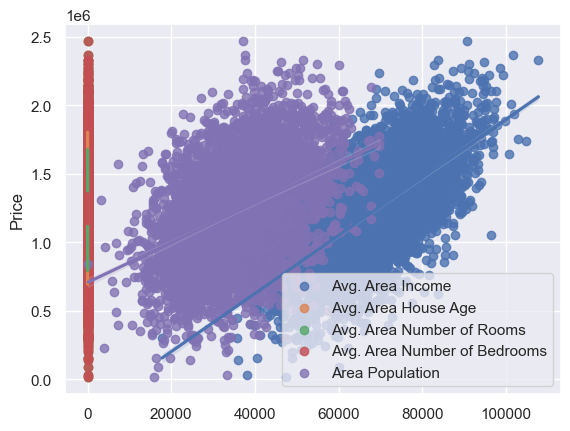

In [27]:
for col in x.columns:
    sns.regplot(x=x[col], y=y, label = col)
    plt.xlabel('')
    plt.legend()

#  Handling outliers:

- Linear Regression is sensitive 

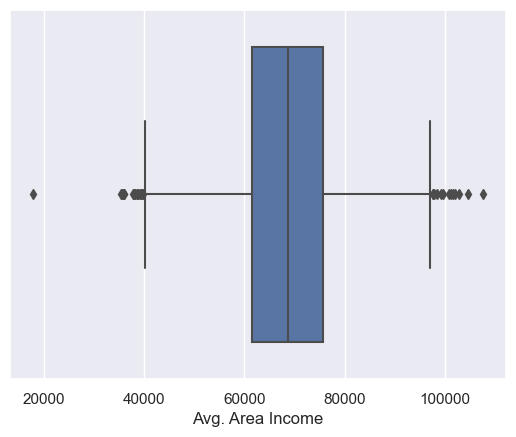

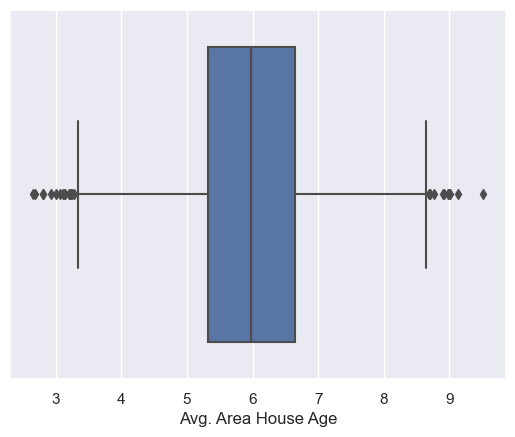

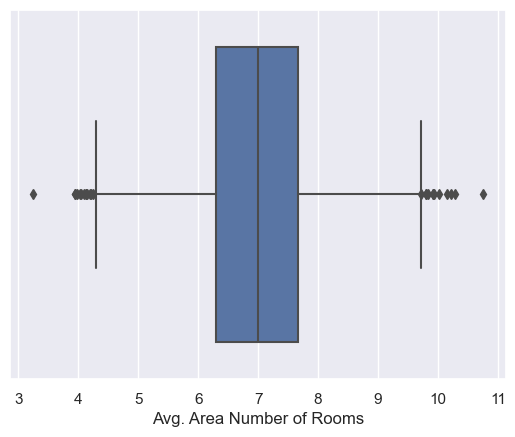

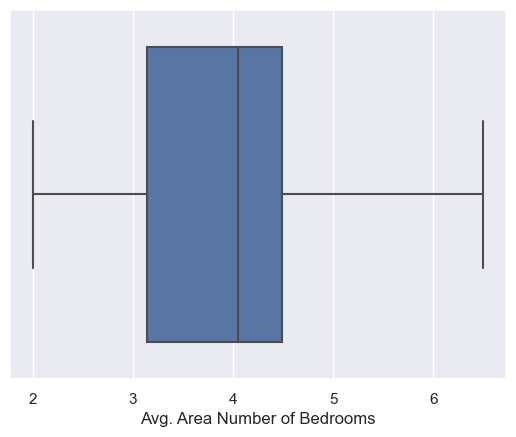

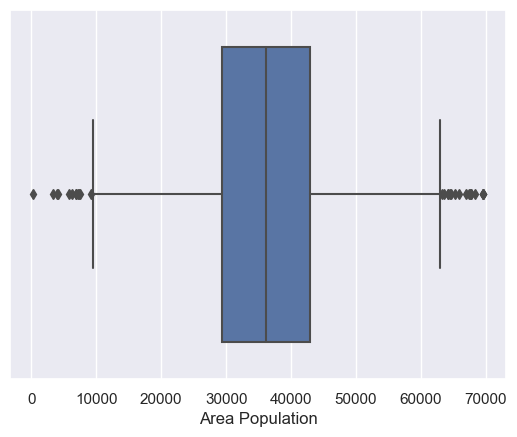

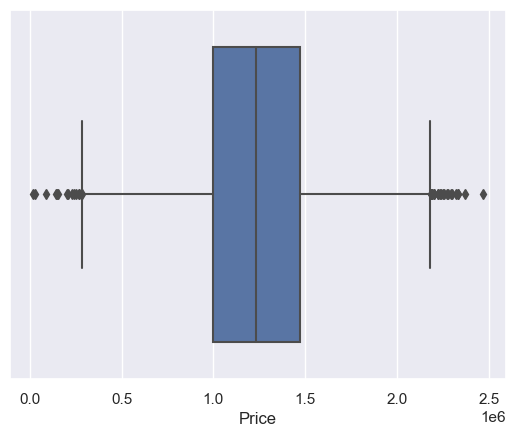

In [28]:
def boxplots(column):
    sns.boxplot(usa_df[column])
    plt.show()
    
for i in list(usa_df.columns):
    boxplots(i)

- Handling outliers by Capping Approach

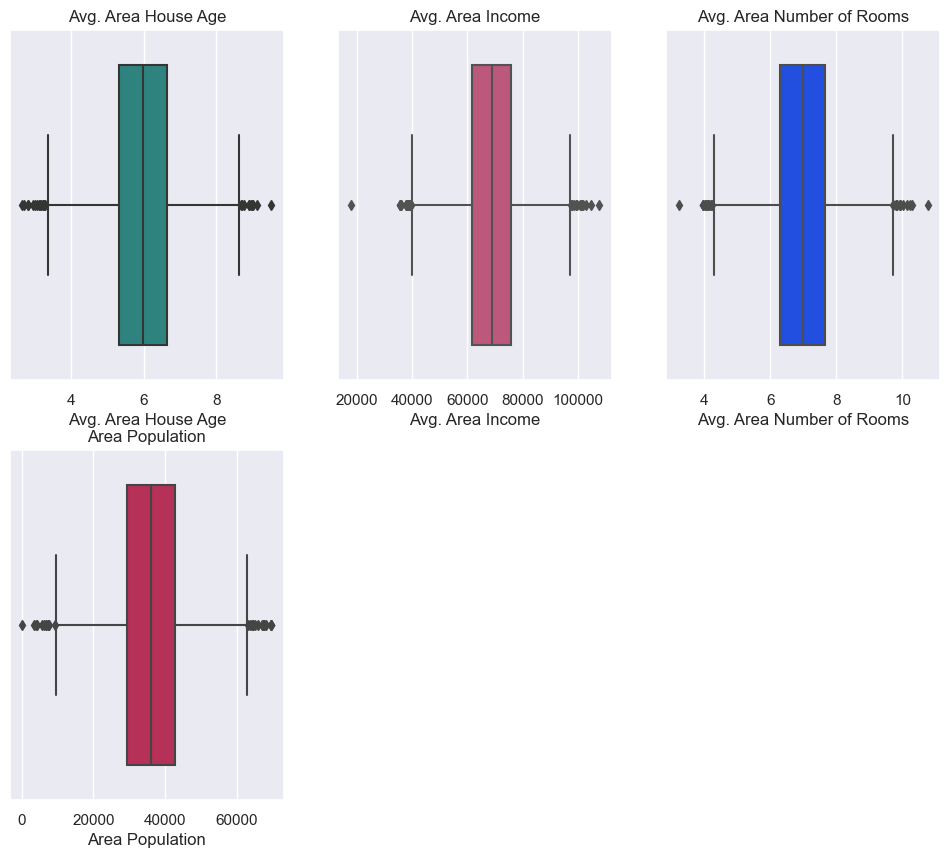

In [29]:
plt.figure(figsize=(12,10))
plt.subplot(2,3,1)
plt.title('Avg. Area House Age')
sns.boxplot(usa_df["Avg. Area House Age"],palette='viridis')


plt.subplot(2,3,2)
plt.title('Avg. Area Income')
sns.boxplot(usa_df["Avg. Area Income"],palette='plasma')


plt.subplot(2,3,3)
plt.title('Avg. Area Number of Rooms')
sns.boxplot(usa_df["Avg. Area Number of Rooms"],palette='bright')


plt.subplot(2,3,4)
plt.title('Area Population')
sns.boxplot(usa_df["Area Population"],palette='rocket')

plt.show()

### Analysing the distribution of the Data

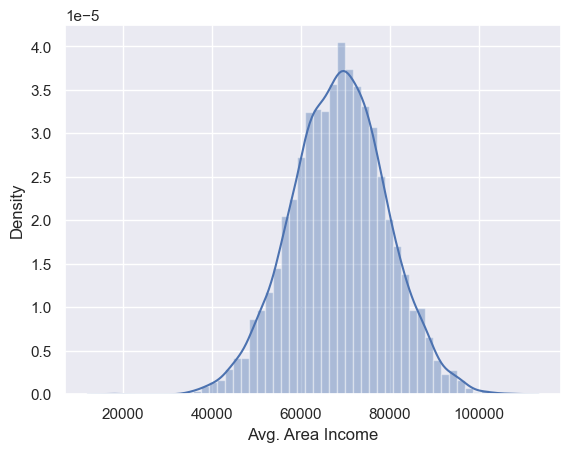

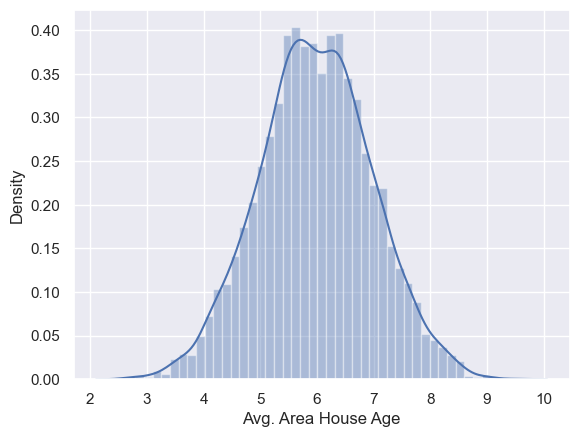

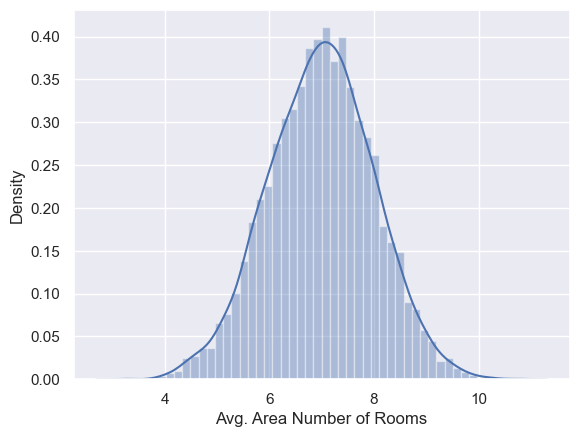

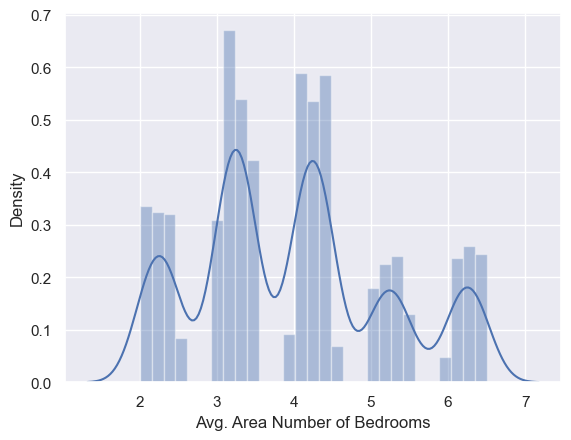

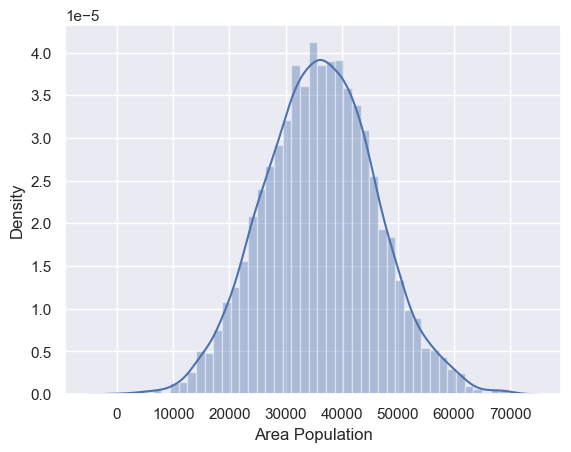

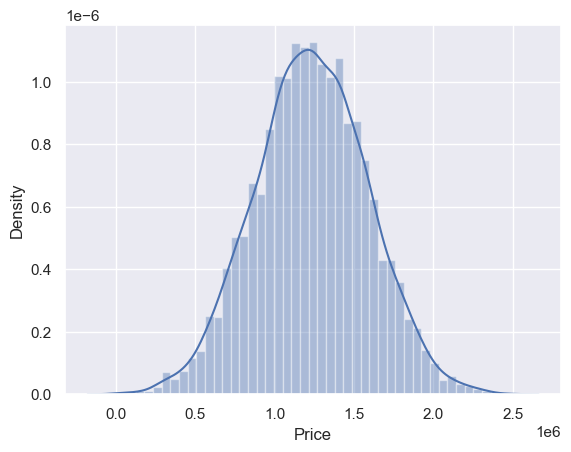

In [30]:
def distplots(col):
    sns.distplot(usa_df[col])
    plt.show()
    
for i in list(usa_df.columns)[0:]:
    distplots(i)

## IQR TEST

In [31]:
outlier_list=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']

In [32]:
for i in outlier_list:
    print(i)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Area Population


In [33]:
def outlier(col):
    Q1=usa_df[col].quantile(0.25)
    Q3=usa_df[col].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    usa_df[col]=np.where(usa_df[col]>upper,upper,np.where(usa_df[col]<lower,lower,usa_df[col]))
    

for i in outlier_list:
    outlier(i)

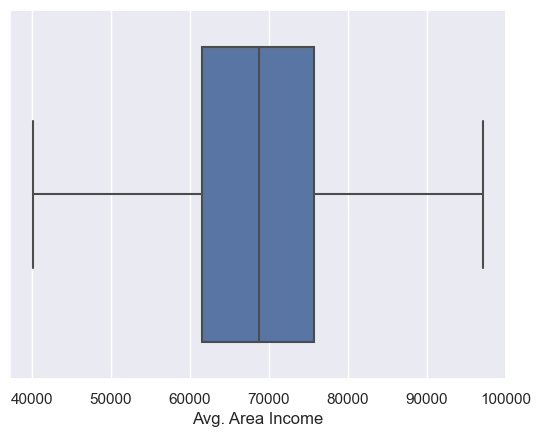

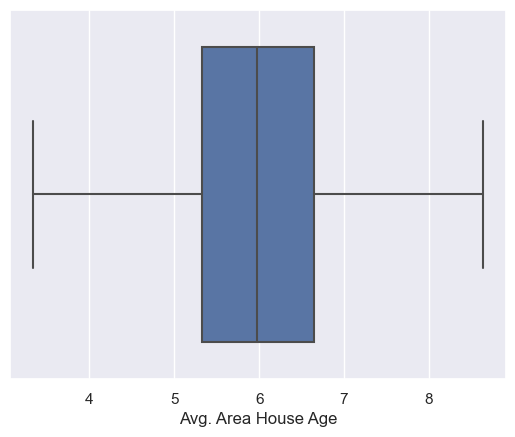

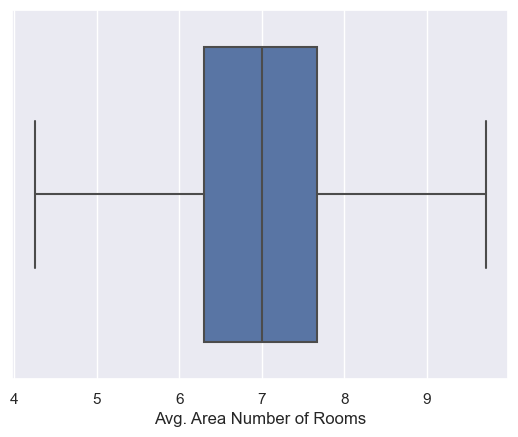

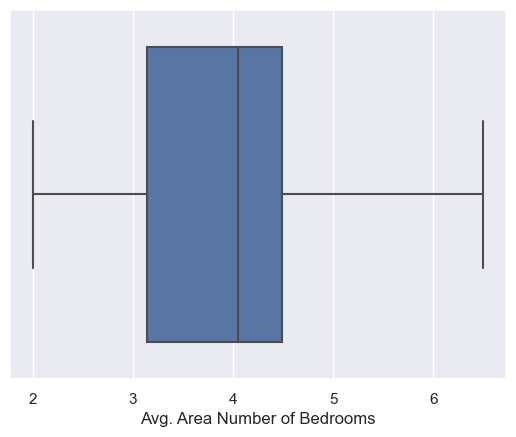

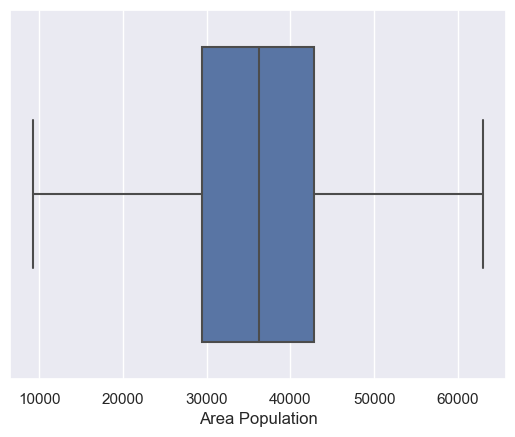

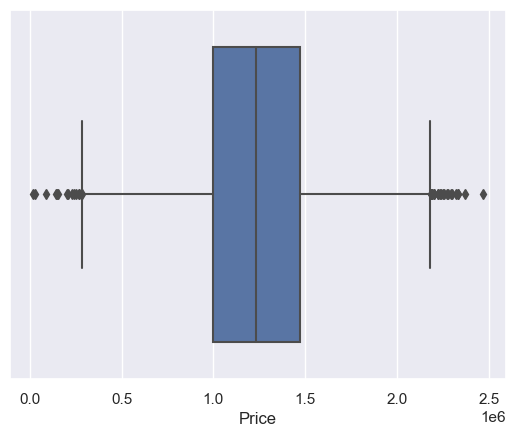

In [34]:
def boxplots(column):
    sns.boxplot(usa_df[column])
    plt.show()
    
for i in list(usa_df.columns):
    boxplots(i)

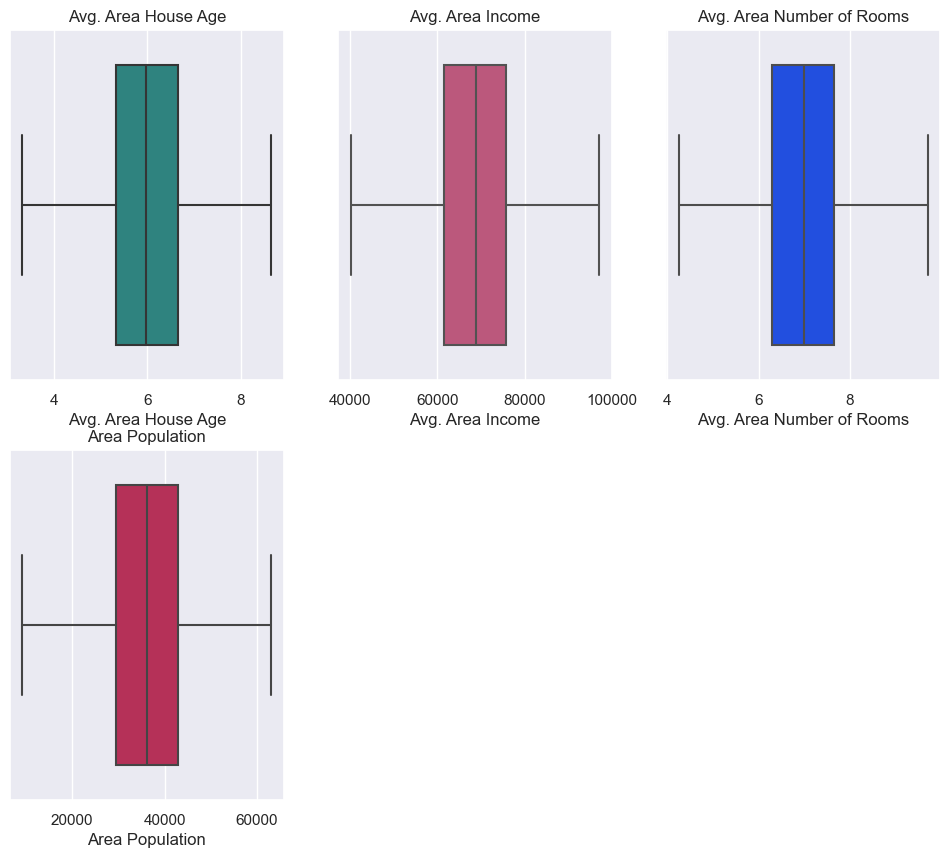

In [35]:
plt.figure(figsize=(12,10))
plt.subplot(2,3,1)
plt.title('Avg. Area House Age')
sns.boxplot(usa_df["Avg. Area House Age"],palette='viridis')


plt.subplot(2,3,2)
plt.title('Avg. Area Income')
sns.boxplot(usa_df["Avg. Area Income"],palette='plasma')


plt.subplot(2,3,3)
plt.title('Avg. Area Number of Rooms')
sns.boxplot(usa_df["Avg. Area Number of Rooms"],palette='bright')


plt.subplot(2,3,4)
plt.title('Area Population')
sns.boxplot(usa_df["Area Population"],palette='rocket')

plt.show()

In [36]:
x=usa_df.drop(['Price'],axis=1)
y=usa_df[['Price']]

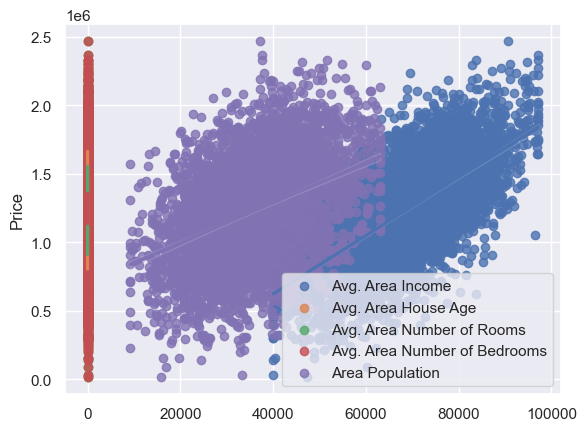

In [37]:
for col in x.columns:
    sns.regplot(x=x[col], y=y, label = col)
    plt.xlabel('')
    plt.legend()

# 📈 Preparation of Data before Training the algorithm

- To train our regression model, the first step is to split up our data into an target(dependent variables) and features (predictors). And we need to do feature selection only on the predictors or independent variable

## Step-1: Spliting into dependent and independent variable

In [38]:
Idv=usa_df.drop('Price',axis=1)

In [39]:
dv=usa_df[['Price']]

In [40]:
Idv

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09      23086.80050  
1                             3.09      40173.07217  
2                             5.13      36882.15940  
3                             3.26      34310.24283  
4                             4.23      26354.10947  
...                            ...              ...  
4995                          3.46      22837.36103  
4996                          4.02      25616.11549  
4997                          2.13      33266.14549  
4998                          5.44      42625.62016  
4999                          4.07      46501.28380  

[5000 rows x 5 columns]

In [41]:
dv

Price
0     1.059034e+06
1     1.505891e+06
2     1.058988e+06
3     1.260617e+06
4     6.309435e+05
...            ...
4995  1.060194e+06
4996  1.482618e+06
4997  1.030730e+06
4998  1.198657e+06
4999  1.298950e+06

[5000 rows x 1 columns]

## step -2: Feature Scaling
- Feature scaling is done only on independent variables. So we need to split the data into target and independent variable.

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
idv_scaler = sc.fit_transform(Idv)
pd.DataFrame(idv_scaler)

0         1         2         3         4
0     1.036382 -0.298541  0.021620  0.087648 -1.325622
1     1.008309  0.025747 -0.256381 -0.722966  0.407049
2    -0.690457 -0.113082  1.523179  0.930687  0.073326
3    -0.495800  1.226822 -1.398967 -0.585161 -0.187484
4    -0.813869 -0.949376  0.850726  0.201134 -0.994293
...        ...       ...       ...       ...       ...
4995 -0.758470  1.877474 -0.849064 -0.423039 -1.350917
4996  0.936679  1.035210 -0.410236  0.030905 -1.069131
4997 -0.491501  1.290004 -2.179585 -1.501155 -0.293363
4998 -0.055437 -0.448985  0.142416  1.181977  0.655755
4999 -0.291006  0.015012 -0.194947  0.071436  1.048775

[5000 rows x 5 columns]

In [43]:
x_sc=pd.DataFrame(data=idv_scaler,columns=x.columns)

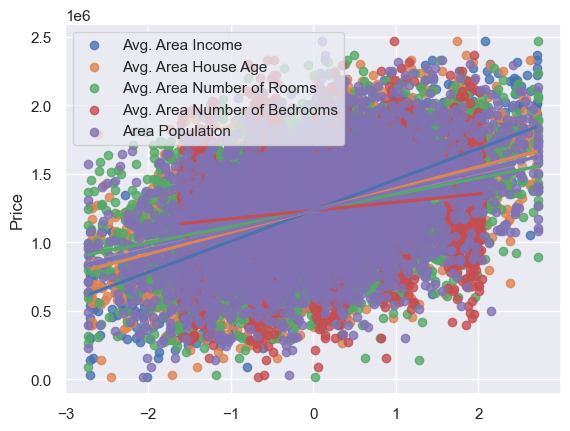

In [44]:
for col in x_sc.columns:
    sns.regplot(x=x_sc[col], y=y, label = col)
    plt.xlabel('')
    plt.legend()

- Summary of Preprocessing:
    1. Handled Missing values
    2.Encoding obj variables
    3.Handled outliers
    4.Feature scaling on independent variables

## Assumptions must be followed while building a perfect LR ML Model:

#### NO MULTICOLLINEARITY:
- The independent variables should not correlated with each other

#### NO AUTOCORRELATION:
- There shouls be no correlation between error terms

#### LINEARITY:
- The relationship between the independent variables and dependent variable must be linear

#### NORMALITY OF RESIDUAL:
- The residual error( Actual-predicted)must be normally distributed

#### HOMOSCEDASTICITY:
- The error terms must have constant variance

#### NO ENDOGENITY :
- Avoiding wrong pick of dependent variable

### step -1: Multi-collinearity check
- There should be no or little mulyicollinearity present for the model building

### METHOD1: HeatMap Visualisation
- If the  high correlation value i.e., >75% b/w an independent variable and dependent variablem then Multicollineqarity exists
- If also the value of  2 or more independented variables are same then also they have multicollinearity
- Need to drop one or more correlated variables or can treat them using regularization(Lasso and Ridge Techniques)

### HeatMap:

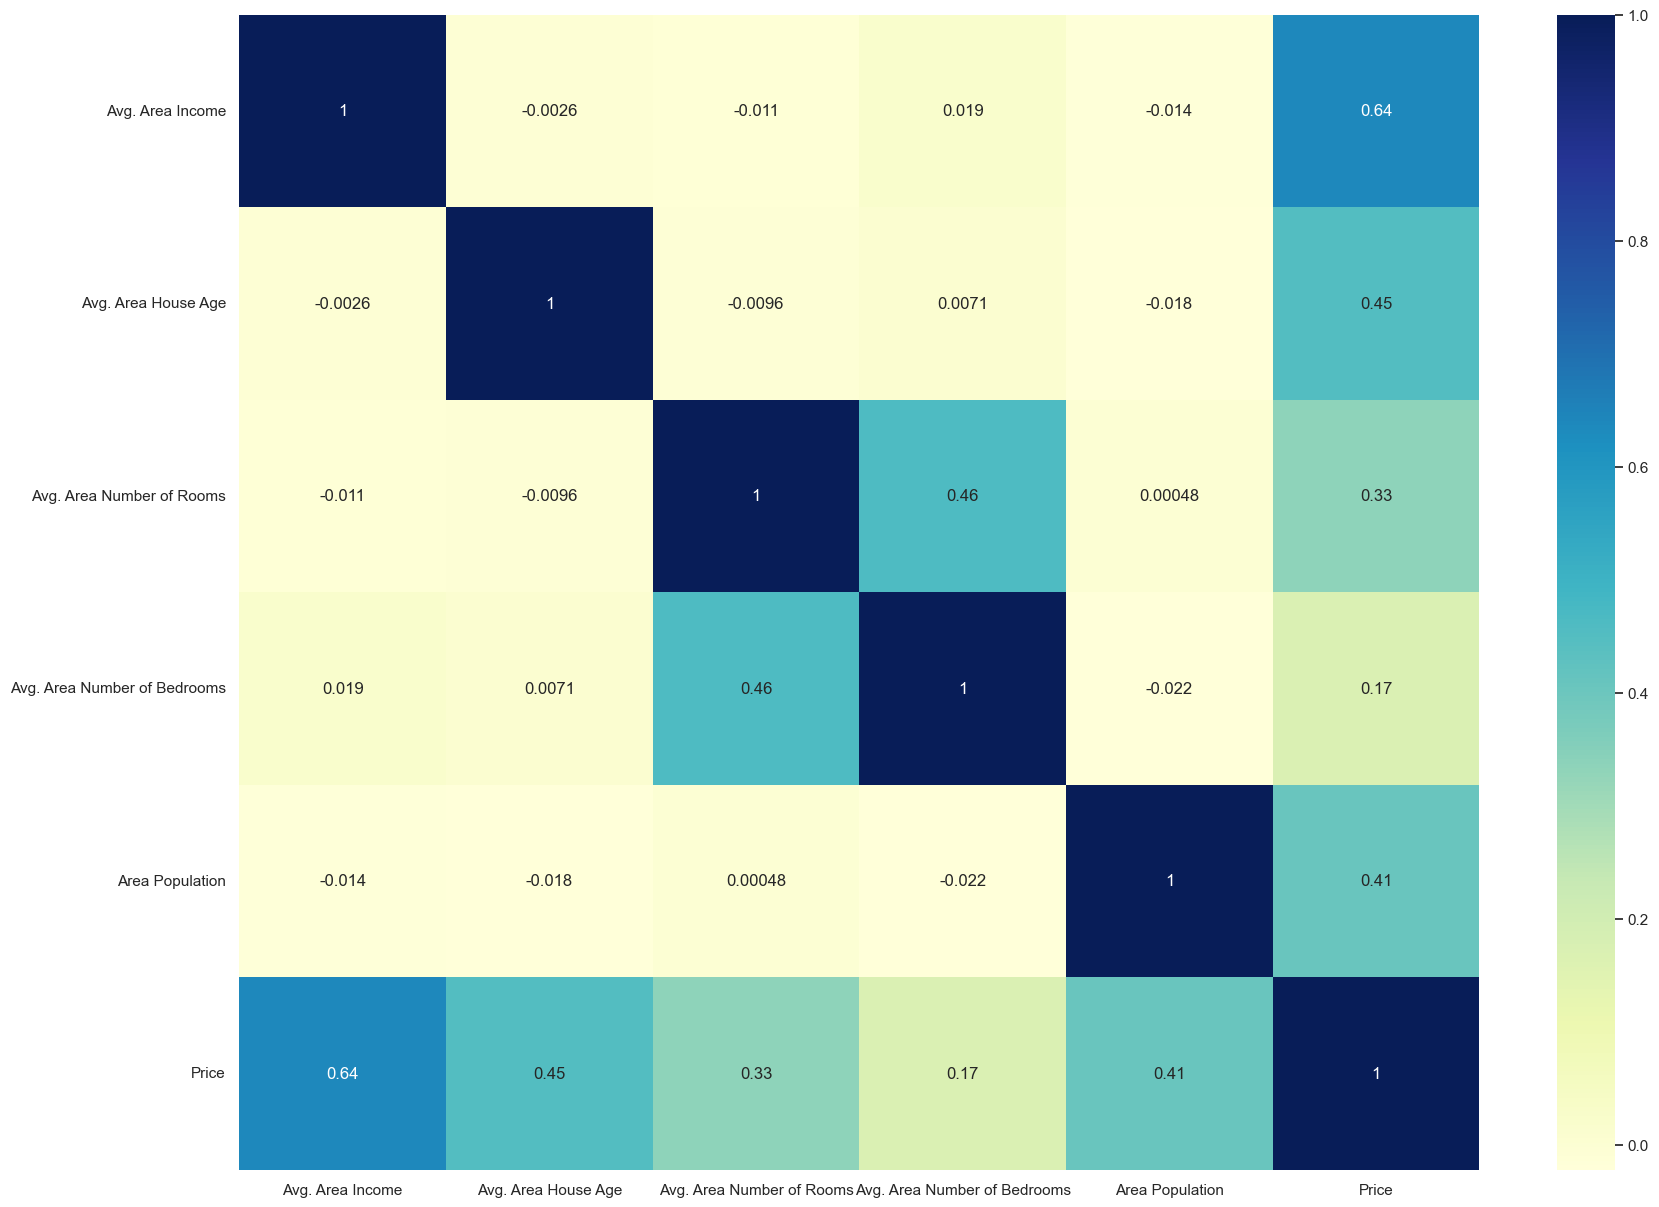

In [45]:
plt.figure(figsize=(20,15))
corr = usa_df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

- We can observe there's no multicollinearity b/w independented variables

## Method2:VIF

### VIF- VARIANCE INFLATION FACTOR

Multicollinearity refers to a situation in regression analysis where there is a high correlation between two or more predictor variables
(also known as independent variables or features). It occurs when the predictor variables in a regression model are highly linearly
related to each other, making it difficult to distinguish the individual effects of each variable on the dependent variable.
In the presence of multicollinearity, it becomes challenging to determine the true relationship between the predictor variables and the
target variable. This is because multicollinearity can lead to unstable and unreliable estimates of the regression coefficients.
Identifying multicollinearity: Common methods to detect multicollinearity include calculating correlation matrices, variance inflation
factors (VIF> 5).
Dealing with multicollinearity: If multicollinearity is detected , several strategies can be employed
Dropping one or more correlated variables from the model. (incase more than 1 features have VIF > 5, drop highest and need to perform VIF check again.

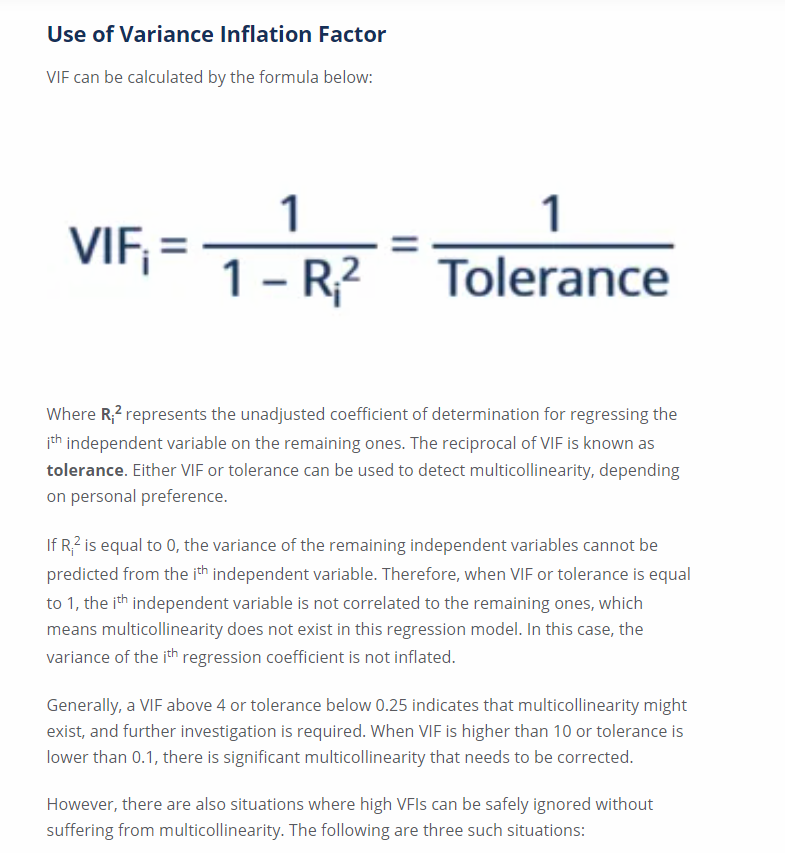

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = idv_scaler

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = Idv.columns

In [47]:
vif

Variance Inflation Factor                      Features
0                   1.001066              Avg. Area Income
1                   1.000593           Avg. Area House Age
2                   1.274838     Avg. Area Number of Rooms
3                   1.275700  Avg. Area Number of Bedrooms
4                   1.001142               Area Population

- for all predictors vif is <5 which is accpetable

#### Hence 'No Multicollineariry' problem exists 

## step-2: Split the data for building the model and prediction
- Test size = 0.3 **
- Split the data (70% Train and 30% Test)


In [48]:
# Split the data into training and test for building the model and for prediction
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Idv, dv, test_size=0.3, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 5) (1500, 5) (3500, 1) (1500, 1)


# Building Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

###  Approach 1:Predict house price by using linear Regression model with test dataset

In [50]:
y_pred_price_test = lm.predict(x_test)
y_pred_price_train = lm.predict(x_train)

In [51]:
y_pred_price_test

array([[1258876.07726026],
       [ 820639.45963685],
       [1744328.8531008 ],
       ...,
       [1454117.50042908],
       [ 644016.77745553],
       [1365235.40337986]])

In [52]:
y_pred_price_train

array([[1732674.34175351],
       [ 831131.1838267 ],
       [1576413.86118684],
       ...,
       [ 973556.85010723],
       [ 922697.34607722],
       [2133699.2582076 ]])

### Validate the actual price of the test data and predicted price

In [53]:
y_test

Price
1718  1.251689e+06
2511  8.730483e+05
345   1.696978e+06
2521  1.063964e+06
54    9.487883e+05
...            ...
3412  7.043759e+05
4020  1.254938e+06
4635  1.434324e+06
1700  5.340775e+05
790   1.427202e+06

[1500 rows x 1 columns]

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_price_test)

0.9156697910198243

In [55]:
r2_score(y_train, y_pred_price_train)

0.915838657450251

- Got R_square value for test data is 91.56%

### By using sklearn linear model
- training accuracy : 91.56%
- test accuracy : 91.58%

### Approach 2:OLS METHOD(ORDINARY LEAST SQUARE)

In [56]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
reg_model = smf.OLS(endog = y_test, exog=x_test).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              8175.
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                        0.00
Time:                        10:37:28   Log-Likelihood:                         -20726.
No. Observations:                1500   AIC:                                  4.146e+04
Df Residuals:                    1495   BIC:                                  4.149e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.5169      0.494     21.285      0.000       9.548      11.486
Avg. Area House Age           5.457e+04   5277.241     10.341      0.000    4.42e+04    6.49e+04
Avg. Area Number of Rooms    -1.182e+04   5926.654     -1.994      0.046   -2.34e+04    -191.168
Avg. Area Number of Bedrooms  6117.5835   5716.473      1.070      0.285   -5095.577    1.73e+04
Area Population                  7.3385      0.597     12.286      0.000       6.167       8.510
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.614
Skew:                          -0.047   Prob(JB):                        0.735
Kurtosis:                       3.032   Cond. No.                     9.36e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The Durbin-Watson Static is a measure used in statistical analysis detect the presence of autocorrelation (also known as serial correlation)in the residuas of a regression analysis.Autocorrelation refers to the correlation between the error terms(residuals) of a regression model at bdifferent points in time
- d=2: No Autocorrelation.The residuals are independent of each other ,indicating that regression model is well specified
- d<2:positive Autocorrelation.The residuals are positively correlated,indicating that there's a pattern of increasing values followed by increasing values or decreasing values followed by decreasing values
- d>2:Negative Autocorrelation:The residuals are negatively correlated,indicating that there's a pattern of increasing values followed by decreasing values or decreasing values followed by increasing values
- d near 0 or 4: Strong Autocorrelation.The residuals are strong correlated,indicating that a clear pattern in the data

#### As d value is 2 there's 'NO AUTOCORRELATION'

### Approach 3:Checking linearity

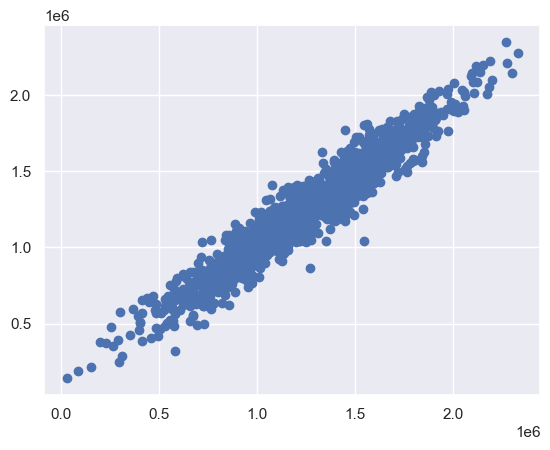

In [57]:
plt.scatter(y_test, y_pred_price_test)

#### Linear relationship exists between actual and predicted target 

### Approach 4: Normality of Residuals

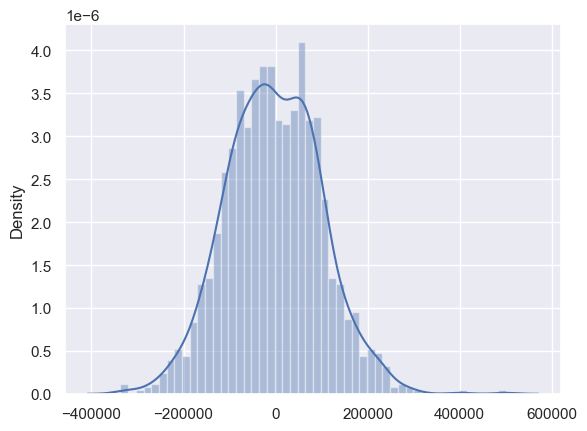

In [58]:
sns.distplot((y_test - y_pred_price_test), bins=50)
plt.show()

#### Residual data is 'Normally distributed'

### Concluding this model
#### Adj. R-squared (uncentered): 0.964 and R-Square:0.964 (both are >70%) which is acceptable
#### All variable is statically significant (p <= 0.05)
#### No bias and variance found

#### Conclude :

##### part 1 : R-Square and Adj-R-Square - satisfied
##### part 2 - p_value - satisfied (please drop bedroom and try)
##### part 3 - assumption :
- no autocorrelation found - satisfied
- no multicollinearity found - satisfied
- homoscedasticity - satisfied (outlier treatement done)
- normality of residual - satisfied
- linearity relation with actual dv vs pred dv - satisfied
- no endogenity - satisfied (as taken right dv - price)

### In order to create less complex model when you have a large number of features in your dataset, some of the Regularization techniques used to address over-fitting and feature selection are:

## Lasso (L1 reguralization):

Mathematically, it consists of a linear model trained with prior as regularizer. The objective function to minimize is:

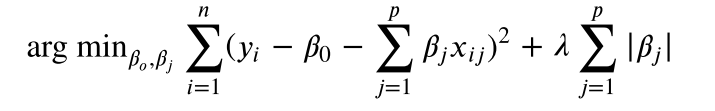!

The lasso estimate thus solves the minimization of the least-squares penalty. controls the strength of reguralization

In [59]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)
print('Lasso coefficient:',lasso.coef_)
print()
print('y_pred_test_lasso:',lasso.predict(x_test))
print()
print('y_pred_train_lasso:',lasso.predict(x_train))
print()
print('Accuracy of train value:',r2_score(y_train,y_pred_train_lasso))
print()
print('Accuracy of test value:',r2_score(y_test,y_pred_test_lasso))

Lasso coefficient: [2.17191235e+01 1.66060711e+05 1.21703154e+05 1.22609014e+03
 1.52790466e+01]

y_pred_test_lasso: [1258876.02558582  820639.45895933 1744328.67845278 ... 1454117.39902452
  644016.9537691  1365235.24434989]

y_pred_train_lasso: [1732674.35880701  831131.27815106 1576413.62113659 ...  973557.14984043
  922697.43401802 2133698.95018024]

Accuracy of train value: 0.9158386574500744

Accuracy of test value: 0.915669790246362


## Ridge :

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of
coefficients. The ridge coefficients minimize a penalized residual sum of squares,

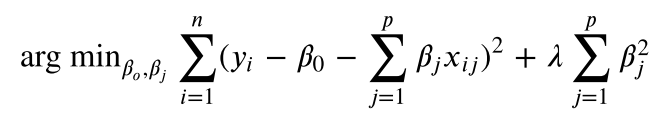

𝜆>= 0 is a complexity parameter that controls the amount of shrinkage: the larger the value of , the greater the
amount of shrinkage and thus the coefficients become more robust to collinearity.

Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.

In [60]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.3)
ridge.fit(x_train,y_train)
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)
print('Ridge coefficient:',ridge.coef_)
print()
print('y_pred_test_ridge:',ridge.predict(x_test))
print()
print('y_pred_train_ridge:',ridge.predict(x_train))
print()
print('Accuracy of train value:',r2_score(y_train,y_pred_train_ridge))
print()
print('Accuracy of test value:',r2_score(y_test,y_pred_test_ridge))

Ridge coefficient: [[2.17191050e+01 1.66045549e+05 1.21689581e+05 1.23152164e+03
  1.52790757e+01]]

y_pred_test_ridge: [[1258870.83801834]
 [ 820661.34993235]
 [1744294.95548756]
 ...
 [1454085.38338467]
 [ 644027.49121265]
 [1365232.93036481]]

y_pred_train_ridge: [[1732670.00867484]
 [ 831148.62519242]
 [1576401.14760094]
 ...
 [ 973584.58153207]
 [ 922713.23589963]
 [2133656.23812792]]

Accuracy of train value: 0.9158386545671147

Accuracy of test value: 0.9156698613756111


## ElasticNet

The first term represents the residual sum of squares, the second term is the L1 regularization term (Lasso), and the third term is the
L2 regularization term (Ridge). The Elastic Net regularization combines both L1 and L2 regularization, allowing for a balance between
feature selection and coefficient shrinkage. TThe parameters 𝜆1 and 𝜆2 control the strengths of the respective regularization terms.

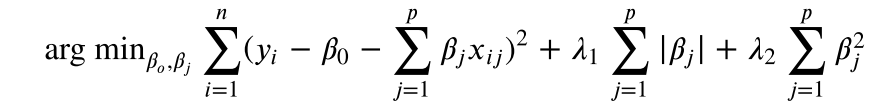

In [61]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)
print("Training Accuracy :", r2_score(y_train, y_pred_train_elastic))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_elastic))


Training Accuracy : 0.8996394100881218

Test Accuracy : 0.8982302414165334


# Gradient Descent

- Always scaled data must be used

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(idv_scaler, dv, test_size=0.3, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 5) (1500, 5) (3500, 1) (1500, 1)


In [63]:
from sklearn.linear_model import SGDRegressor

In [64]:
gd = SGDRegressor()
gd.fit(x_train, y_train)
y_pred_gd_train = gd.predict(x_train)
y_pred_gd_test = gd.predict(x_test)
Train_accuracy_gd =r2_score(y_train, y_pred_gd_train)
Test_accuracy_gd = r2_score(y_test, y_pred_gd_test)
print("GD Trainging Accuracy :", Train_accuracy_gd )
print("GD Test Accuracy :",Test_accuracy_gd )

GD Trainging Accuracy : 0.9158175980881661
GD Test Accuracy : 0.9157318580747348


<AxesSubplot:xlabel='Price'>

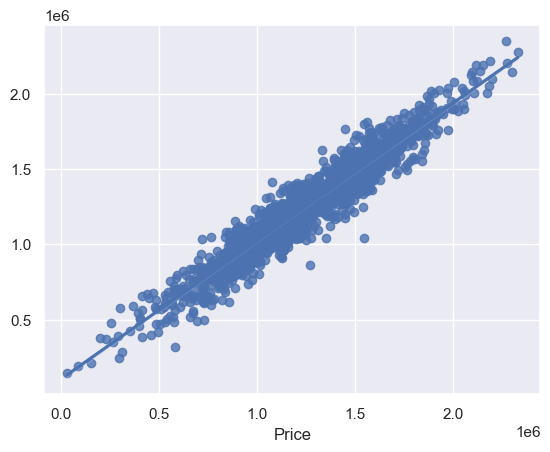

In [65]:
sns.regplot(x=y_test,y=y_pred_gd_test,color='b')

# Performance Matrix

1.MEAN ABSOLUTE ERROR(MAE):

In [66]:
from sklearn import metrics

In [67]:
print('MEAN ABSOLUTE ERROR:',metrics.mean_absolute_error(y_test,y_pred_price_test))
print('MEAN ABSOLUTE PERCENT ERROR:',metrics.mean_absolute_percentage_error(y_test,y_pred_price_test)*100)
print('MEAN SQUARE ERROR:',metrics.mean_squared_error(y_test,y_pred_price_test))
print('ROOT MEAN SQUARE ERROR:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_price_test)))

MEAN ABSOLUTE ERROR: 82283.07981938141
MEAN ABSOLUTE PERCENT ERROR: 7.879779862399324
MEAN SQUARE ERROR: 10523050518.693022
ROOT MEAN SQUARE ERROR: 102581.92101288131


# POLYNOMIAL LINEAR REGRESSION

### Step:1 Applying polynomial linear regression 

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

### Step2: Building the Model

In [69]:
linear_1=LinearRegression()
linear_1.fit(x_train_poly,y_train)

LinearRegression()

### Step3:Predict Price

In [70]:
y_pred_test_poly=linear_1.predict(x_test_poly)
y_pred_train_poly=linear_1.predict(x_train_poly)
print('Predicted test data:',y_pred_test_poly)
print('Predicted train data:',y_pred_train_poly)

Predicted test data: [[1255842.87828852]
 [ 826915.2772386 ]
 [1750544.32196134]
 ...
 [1470250.54030722]
 [ 645540.33943743]
 [1353743.27311483]]
Predicted train data: [[1731362.14390741]
 [ 829682.43869557]
 [1568011.96117483]
 ...
 [ 982788.26766618]
 [ 921006.79933816]
 [2146343.55904819]]


###  Step4:Evaluate the model

In [71]:
print('Accuracy of test data:',r2_score(y_test,y_pred_test_poly))
print('Accuracy of train data:',r2_score(y_train,y_pred_train_poly))

Accuracy of test data: 0.9145945509806062
Accuracy of train data: 0.9162933463673933


In [72]:
x_train

array([[ 1.71217935,  0.28616046, -0.31086473, -0.60947981,  0.6521043 ],
       [-0.82476881, -0.10858328, -1.08703049,  0.14439123, -0.41520901],
       [ 0.54710038,  0.59265537,  1.19539462,  1.91963595, -0.1862962 ],
       ...,
       [-1.22625622, -2.27131129, -0.11909217, -1.36335086,  2.72666288],
       [-0.52424664, -0.04278958, -1.07267214,  0.09575439, -0.34821108],
       [ 0.61393408,  1.68942625,  1.45127292,  0.28219562,  2.02706647]])

In [73]:
x_train_df=pd.DataFrame(x_train)
x_test_df=pd.DataFrame(x_test)

### Visualization:

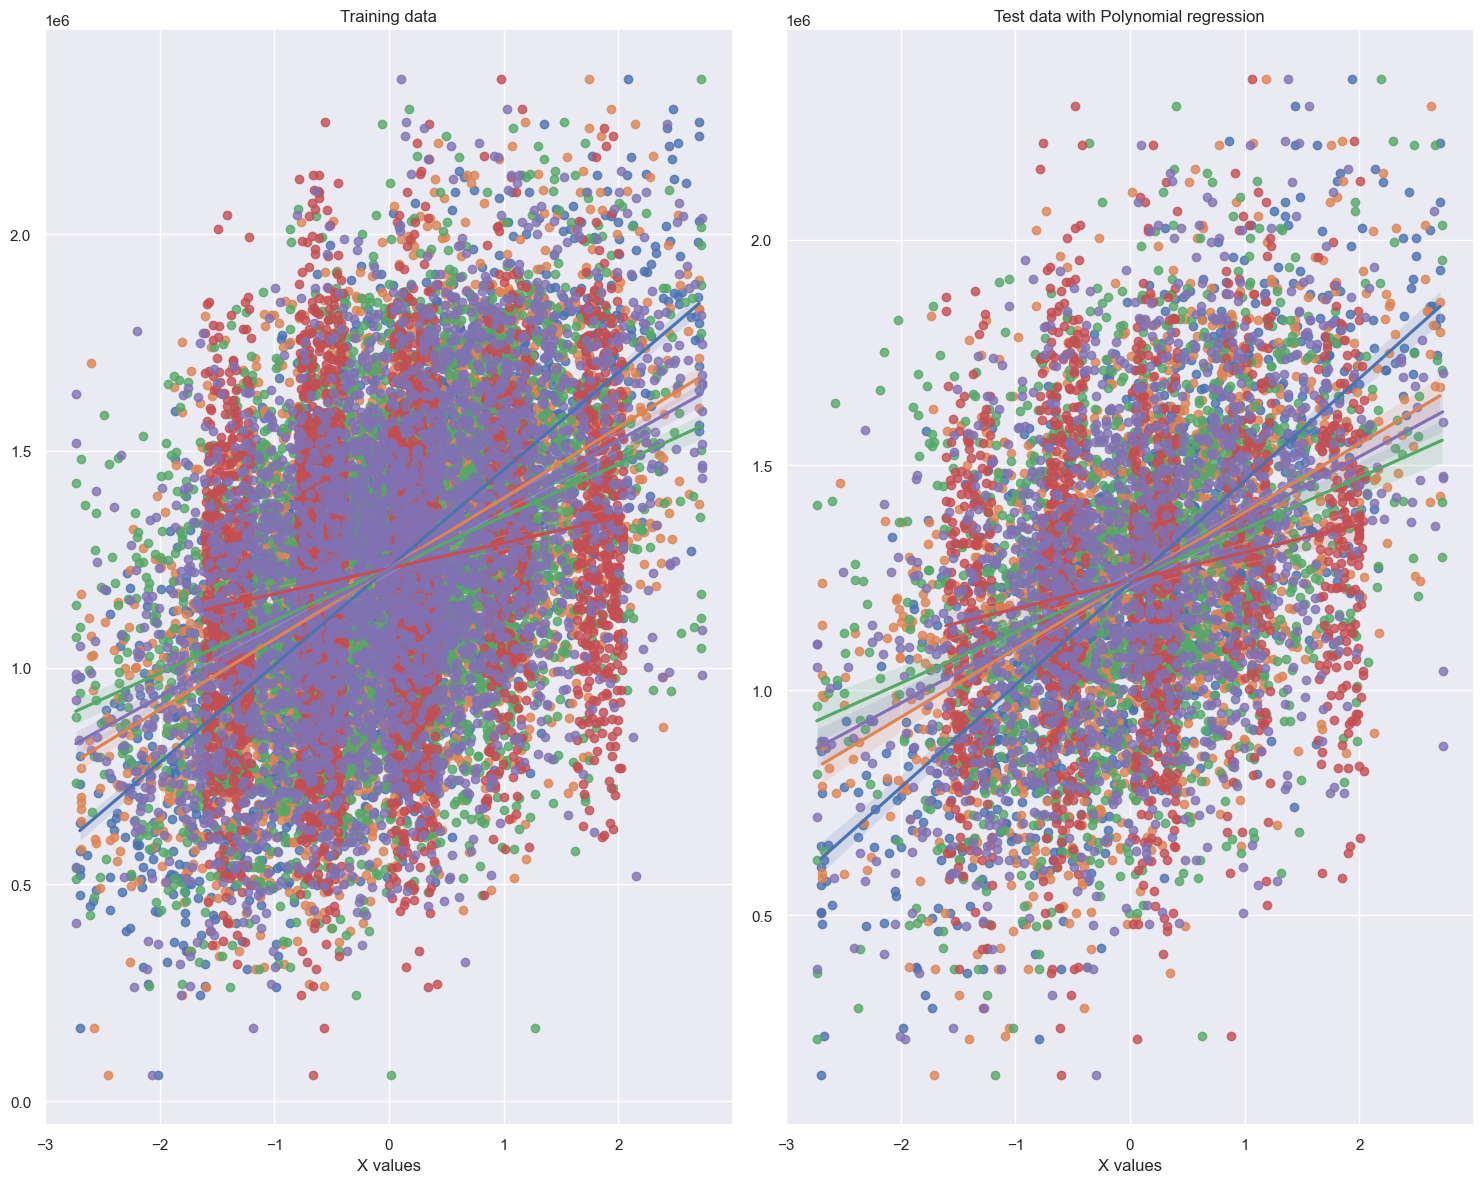

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12))
# Plot regression for training data
for i in range(len(x_train_df.columns)):
    sns.regplot(x=x_train_df.iloc[:,i ], y=y_pred_train_poly, ax=ax1, )
    ax1.set_title('Training data')
    ax1.set_xlabel('X values')
# Plot regression for test data
for i in range(len(x_test_df.columns)):
    sns.regplot(x=x_test_df.iloc[:, i], y=y_pred_test_poly, ax=ax2)
    ax2.set_title('Test data with Polynomial regression')
    ax2.set_xlabel('X values')
# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()


### Regularization techniques(For Polynomial data):

#### Lasso (L1 reguralization):

In [75]:
lasso_poly=Lasso(alpha=0.1)
lasso_poly.fit(x_train_poly,y_train)
y_pred_train_lasso_poly=lasso_poly.predict(x_train_poly)
y_pred_test_lasso_poly=lasso_poly.predict(x_test_poly)
print('Lasso coefficient:',lasso_poly.coef_)
print()
print('y_pred_test_lasso_poly:',lasso_poly.predict(x_test_poly))
print()
print('y_pred_train_lasso_poly:',lasso_poly.predict(x_train_poly))
print()
print('Accuracy of train value:',r2_score(y_train,y_pred_train_lasso_poly))
print()
print('Accuracy of test value:',r2_score(y_test,y_pred_test_lasso_poly))

Lasso coefficient: [     0.         229688.26614176 163816.35783849 121829.71590338
   2119.31250282 150565.62549386    378.89787991  -1151.67561441
  -1892.04620441   1330.63961083   1999.47917931   2454.01789478
   2839.36594422  -5088.25877815  -1790.14036086   2165.90721554
   -506.45440876   1464.09592682  -1187.88376457  -2100.75762343
   1117.70201038]

y_pred_test_lasso_poly: [1255842.93979451  826915.29233441 1750543.63925981 ... 1470250.04807014
  645540.84057757 1353743.66072096]

y_pred_train_lasso_poly: [1731361.90827046  829682.61114761 1568012.07682876 ...  982787.81497091
  921006.93804391 2146342.2523163 ]

Accuracy of train value: 0.9162933463655455

Accuracy of test value: 0.9145946249925349


#### Ridge (L2 reguralization):

In [76]:
ridge_poly=Ridge(alpha=0.3)
ridge_poly.fit(x_train_poly,y_train)
y_pred_train_ridge_poly=ridge_poly.predict(x_train_poly)
y_pred_test_ridge_poly=ridge_poly.predict(x_test_poly)
print('Ridge coefficient:',ridge_poly.coef_)
print()
print('y_pred_test_ridge_poly:',ridge_poly.predict(x_test_poly))
print()
print('y_pred_train_ridge_poly:',ridge_poly.predict(x_train_poly))
print()
print('Accuracy of train value:',r2_score(y_train,y_pred_train_ridge_poly))
print()
print('Accuracy of test value:',r2_score(y_test,y_pred_test_ridge_poly))

Ridge coefficient: [[     0.         229667.91908461 163801.64229393 121815.82610824
    2125.70610822 150552.66617115    379.01423861  -1152.75281758
   -1891.57745436   1329.71149763   1999.59271176   2453.04137532
    2839.33111221  -5088.01828372  -1790.56507026   2166.52794939
    -510.04503278   1464.56342406  -1186.16244827  -2101.34964214
    1118.26142404]]

y_pred_test_ridge_poly: [[1255838.86332332]
 [ 826964.04466602]
 [1750494.36007113]
 ...
 [1470218.3468671 ]
 [ 645585.41053063]
 [1353742.64953024]]

y_pred_train_ridge_poly: [[1731314.90408141]
 [ 829723.79878061]
 [1567987.59964684]
 ...
 [ 982805.47990204]
 [ 921039.16344726]
 [2146257.91412997]]

Accuracy of train value: 0.9162933389510901

Accuracy of test value: 0.9145951156949274


#### ElasticNet:

In [77]:
elastic_poly=ElasticNet(alpha=0.3)
elastic_poly.fit(x_train_poly,y_train)
y_pred_train_elastic_poly=elastic_poly.predict(x_train_poly)
y_pred_test_elastic_poly=elastic_poly.predict(x_test_poly)
print('Elastic coefficient:',elastic_poly.coef_)
print()
print('y_pred_test_elastic_poly:',elastic_poly.predict(x_test_poly))
print()
print('y_pred_train_elastic_poly:',elastic_poly.predict(x_train_poly))
print()
print('Accuracy of train value:',r2_score(y_train,y_pred_train_elastic_poly))
print()
print('Accuracy of test value:',r2_score(y_test,y_pred_test_elastic_poly))

Elastic coefficient: [ 0.00000000e+00  1.98761484e+05  1.41504073e+05  1.02229284e+05
  9.69011159e+03  1.30703723e+05  4.65954297e+02 -2.43941937e+03
 -1.07728648e+03 -4.08425628e+01  1.95272290e+03  9.95934119e+02
  2.45150881e+03 -4.40160115e+03 -2.19214015e+03  2.47476551e+03
 -3.71830368e+03  1.70970094e+03  7.21550431e+02 -2.57041947e+03
  1.83262493e+03]

y_pred_test_elastic_poly: [1250793.39371943  896802.0984985  1675369.75919002 ... 1424445.95271404
  715824.53553474 1350100.8746628 ]

y_pred_train_elastic_poly: [1660703.0555456   889450.05513953 1530951.48649122 ... 1010065.11544968
  967511.97949706 2018223.87905533]

Accuracy of train value: 0.8996563474294361

Accuracy of test value: 0.8984725661575785


### Gradient Descent(for polynomial data)

In [78]:
gd_poly = SGDRegressor()
gd_poly.fit(x_train_poly, y_train)
y_pred_gd_train_poly = gd_poly.predict(x_train_poly)
y_pred_gd_test_poly = gd_poly.predict(x_test_poly)
Train_accuracy_gd =r2_score(y_train, y_pred_gd_train_poly)
Test_accuracy_gd = r2_score(y_test, y_pred_gd_test_poly)
print("GD Trainging Accuracy :", Train_accuracy_gd )
print("GD Test Accuracy :",Test_accuracy_gd )

GD Trainging Accuracy : 0.9155597453008983
GD Test Accuracy : 0.9150701100037861


### Performance Matrix(for polynomial data):

In [79]:
print('MEAN ABSOLUTE ERROR:',metrics.mean_absolute_error(y_test,y_pred_test_poly))
print('MEAN ABSOLUTE PERCENT ERROR:',metrics.mean_absolute_percentage_error(y_test,y_pred_test_poly)*100)
print('MEAN SQUARE ERROR:',metrics.mean_squared_error(y_test,y_pred_test_poly))
print('ROOT MEAN SQUARE ERROR:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_poly)))

MEAN ABSOLUTE ERROR: 82751.02257549495
MEAN ABSOLUTE PERCENT ERROR: 7.9613869947048705
MEAN SQUARE ERROR: 10657223140.68988
ROOT MEAN SQUARE ERROR: 103233.82750188952


In [132]:
logit_acc=r2_score(y_test, y_pred_price_test)
logit_acc_train=r2_score(y_train, y_pred_price_train)

# DECISION TREE:

## Step1:Building Model

In [80]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

## Step2:Prediction

In [81]:
y_pred_train_dt=dtree.predict(x_train)
y_pred_test_dt=dtree.predict(x_test)

In [82]:
y_pred_train_dt

array([1723729.655 , 1039380.722 , 1648246.774 , ..., 1102641.114 ,
        865099.5234, 2108376.166 ])

In [83]:
y_pred_test_dt

array([1107159.781 ,  975385.5554, 1526025.659 , ..., 1401767.904 ,
        870252.411 , 1472887.247 ])

## Step3:Evaluation

In [84]:
print('Accuracy of Train decision tree data:',r2_score(y_train,y_pred_train_dt))
print('===============================================================================================')
print('Accuracy of Test decision tree data:',r2_score(y_test,y_pred_test_dt))


Accuracy of Train decision tree data: 1.0
Accuracy of Test decision tree data: 0.7388036302722282


### overfitting problem---->high variance

## Feature Importance Variable

In [85]:
dtree.feature_importances_

array([0.4223929 , 0.23842145, 0.12791219, 0.01724449, 0.19402896])

In [86]:
pd.DataFrame(index=x.columns, data=dtree.feature_importances_, columns=['Feature Importance'])

Feature Importance
Avg. Area Income                        0.422393
Avg. Area House Age                     0.238421
Avg. Area Number of Rooms               0.127912
Avg. Area Number of Bedrooms            0.017244
Area Population                         0.194029

In [134]:
from sklearn.model_selection import GridSearchCV

In [146]:
param_grid={'criterion':["squared_error"],
            'splitter' :["best", "random"],
            'max_depth':[3,6,7],
            'max_features':["auto", "sqrt", "log2"],
            'random_state':[None]
             }
grid=GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True)
grid.fit(x_train,y_train)
DT_grid_pred_train=grid.predict(x_train)
DT_grid_pred_test=grid.predict(x_test)
Train_acc = r2_score(y_train, DT_grid_pred_train)
Test_acc = r2_score(y_test, DT_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)

Trainging Accuracy Score : 0.8489611740591203
Test Accuracy Score : 0.7466548774132288


In [147]:
print('Accuracy of the Train data before Hyper Tuning:',r2_score(y_train,y_pred_train_dt))
print('===============================================================================================')
print('Accuracy of the Test data before Hyper Tuning:',r2_score(y_test,y_pred_test_dt))
print('===============================================================================================')
print('Accuracy of the Train data after Hyper Tuning:',r2_score(y_train,DT_grid_pred_train))
print('===============================================================================================')
print('Accuracy of the Test data after Hyper Tuning:',r2_score(y_test,DT_grid_pred_test))


Accuracy of the Train data before Hyper Tuning: 1.0
Accuracy of the Test data before Hyper Tuning: 0.7388036302722282
Accuracy of the Train data after Hyper Tuning: 0.8489611740591203
Accuracy of the Test data after Hyper Tuning: 0.7466548774132288


## Plotting tree after Hyper parameter tunning:

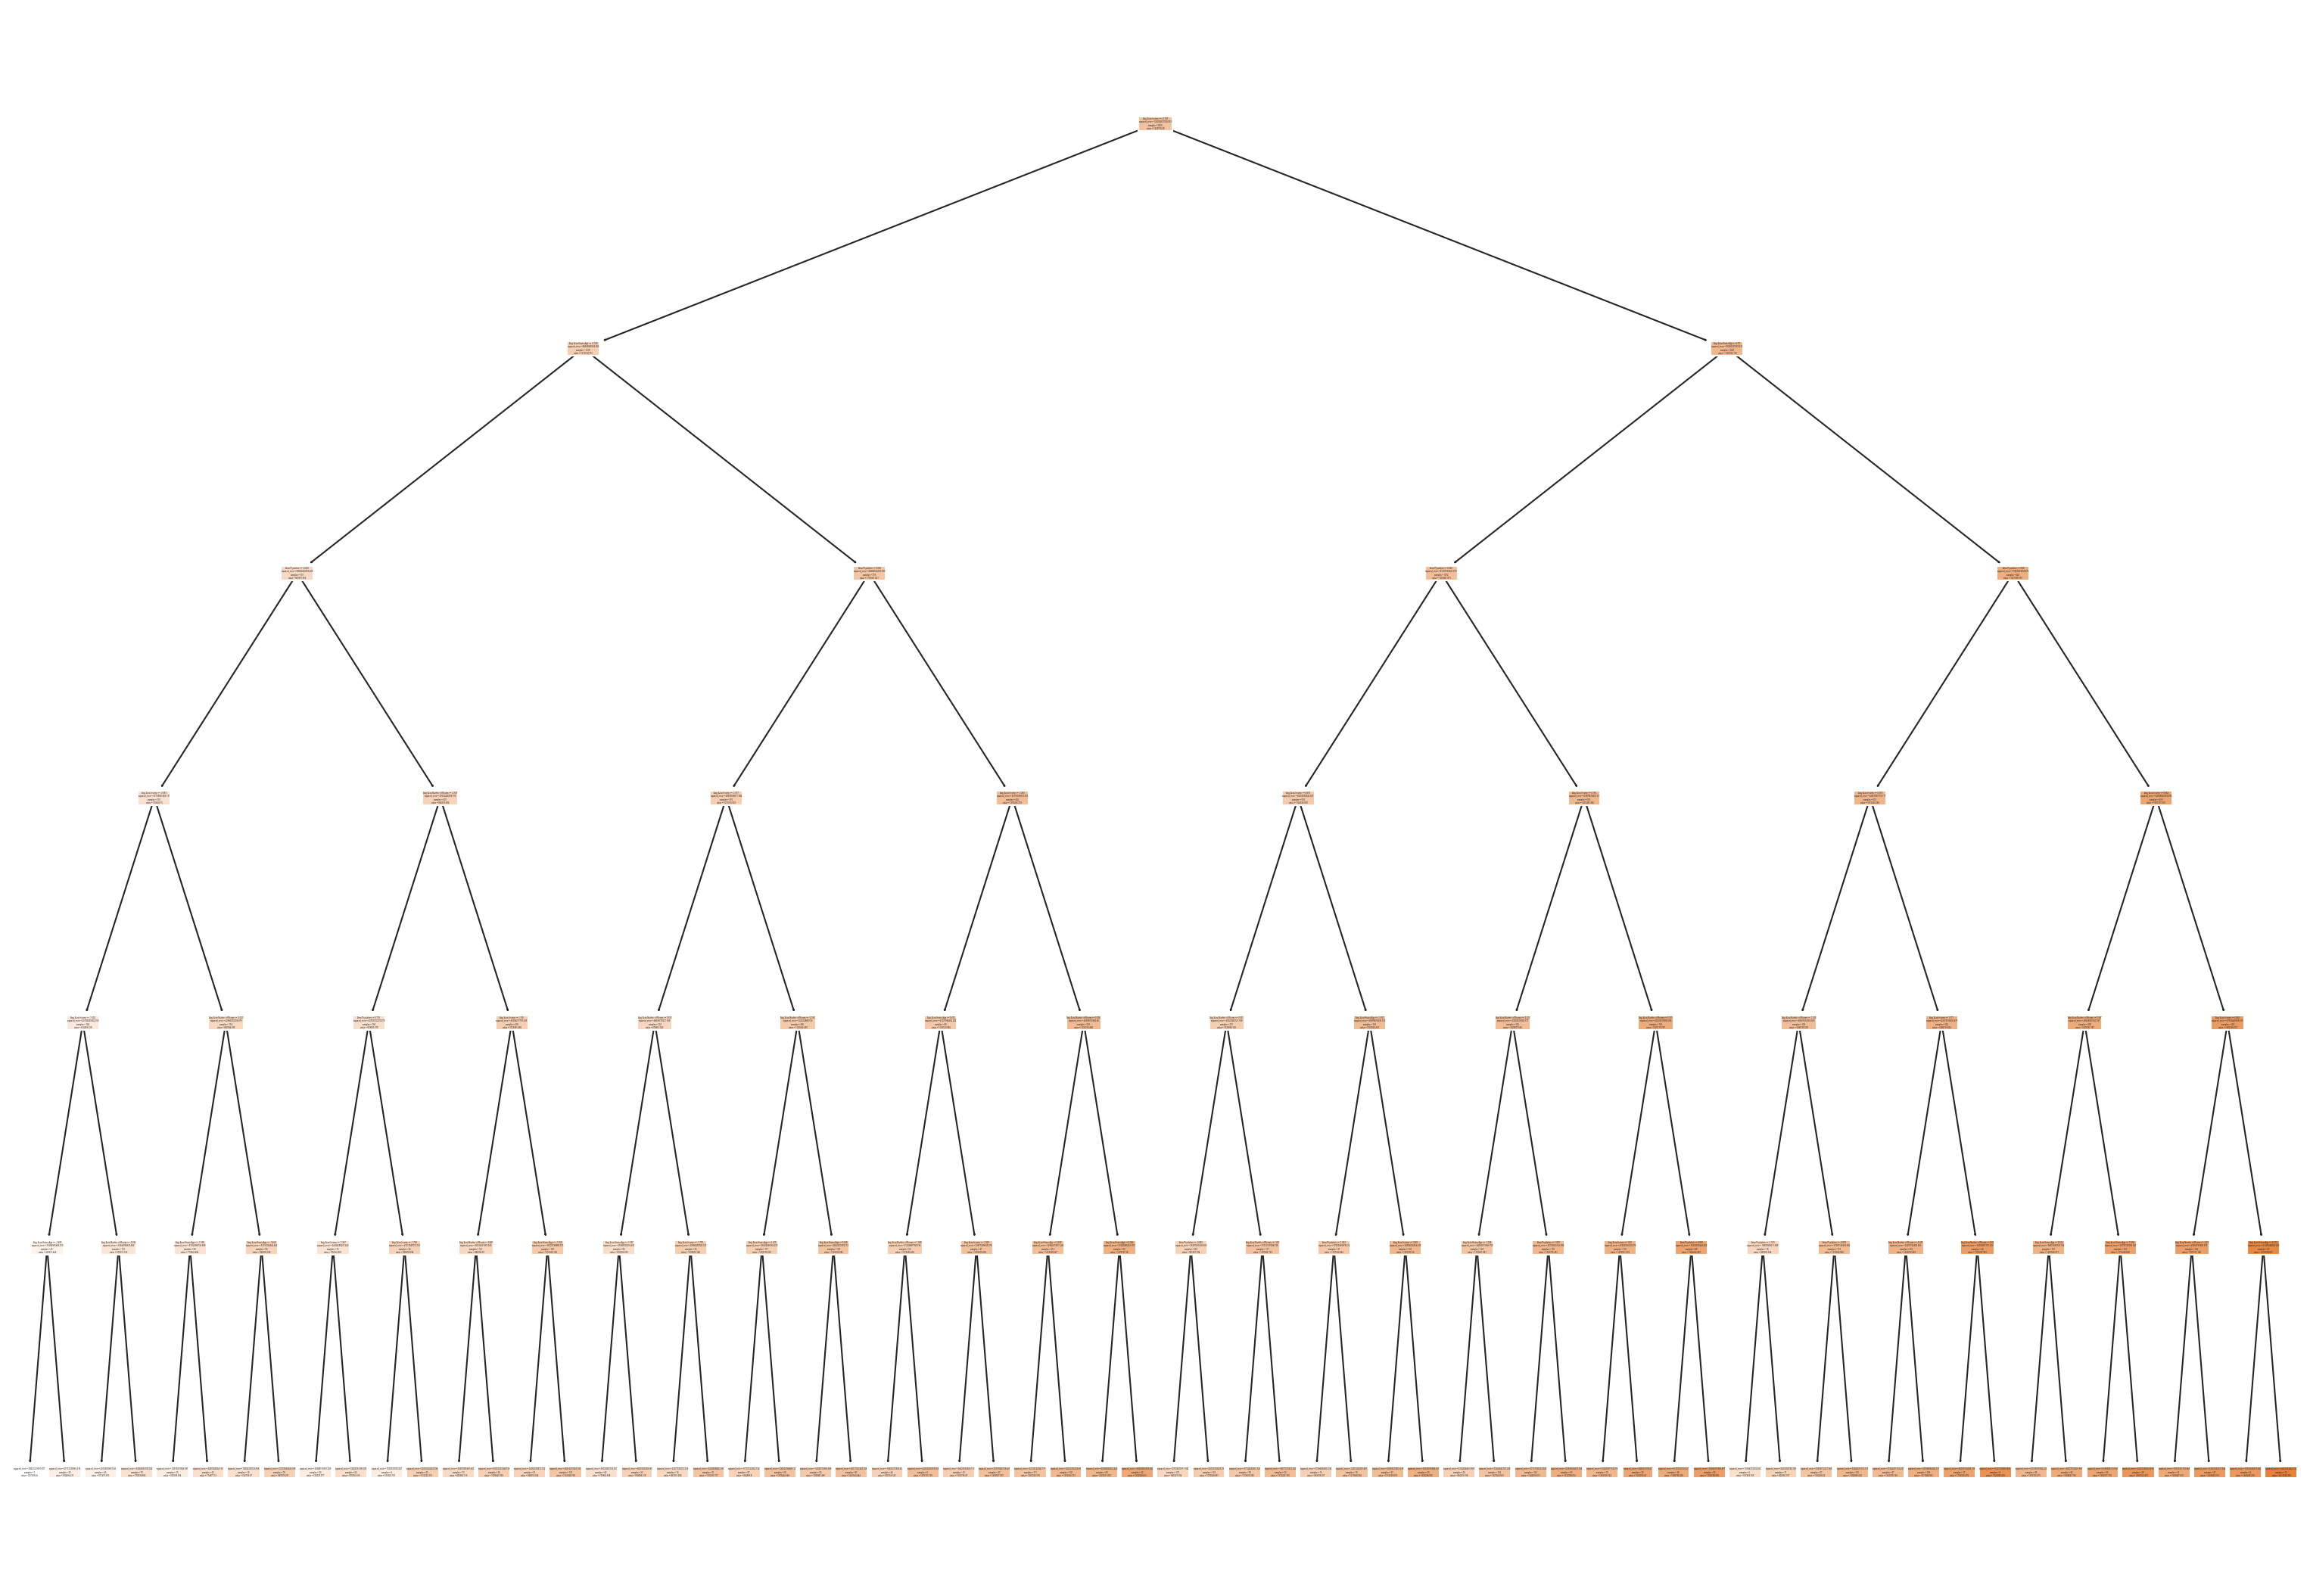

In [93]:
from sklearn.tree import plot_tree
plt.figure(figsize=(26,18),dpi=150)
plot_tree(dtree_prun,filled=True,feature_names=x.columns)
plt.show()

In [149]:
dtree_acc=r2_score(y_test, DT_grid_pred_test)
dtree_acc_train=r2_score(y_train, DT_grid_pred_train)

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [95]:
y_pred_train_rf=rf_reg.predict(x_train)
y_pred_test_rf=rf_reg.predict(x_test)

In [96]:
y_pred_train_rf

array([1698980.67326 ,  990244.144198, 1611783.0225  , ...,
       1035933.126019,  927607.103809, 2038728.64462 ])

In [97]:
y_pred_test_rf

array([1223683.176244,  835294.367045, 1723945.13369 , ...,
       1395988.20146 ,  805836.430761, 1315187.482638])

In [98]:
print('Accuracy of Train decision tree data:',r2_score(y_train,y_pred_train_rf))
print('===============================================================================================')
print('Accuracy of Test decision tree data:',r2_score(y_test,y_pred_test_rf))

Accuracy of Train decision tree data: 0.9835017510458074
Accuracy of Test decision tree data: 0.8766506401965685


In [157]:
param_grid={'criterion': ['squared_error'],
            'max_depth' :[2,4,6],
            'min_samples_split' :[2,4,6,8,10],
            'min_samples_leaf' :[1,2,4],
            'max_features':['sqrt','log2',None],
            'oob_score':[True]
            } 
grid=GridSearchCV(RandomForestRegressor(),param_grid,refit=True)
grid.fit(x_train,y_train)
rf_grid_pred_train=grid.predict(x_train)
rf_grid_pred_test=grid.predict(x_test)
Train_acc = r2_score(y_train, rf_grid_pred_train)
Test_acc = r2_score(y_test, rf_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)

Trainging Accuracy Score : 0.8702751356870114
Test Accuracy Score : 0.811374687947274


In [158]:
print('Accuracy of the Train data before Hyper Tuning by Random Forest:',r2_score(y_train,y_pred_train_rf))
print('===============================================================================================')
print('Accuracy of the Test data before Hyper Tuning by Random Forest:',r2_score(y_test,y_pred_test_rf))
print('===============================================================================================')
print('Accuracy of the Train data after Hyper Tuning by Random Forest:',r2_score(y_train,rf_grid_pred_train))
print('===============================================================================================')
print('Accuracy of the Test data after Hyper Tuning by Random Forest:',r2_score(y_test,rf_grid_pred_test))


Accuracy of the Train data before Hyper Tuning by Random Forest: 0.9835017510458074
Accuracy of the Test data before Hyper Tuning by Random Forest: 0.8766506401965685
Accuracy of the Train data after Hyper Tuning by Random Forest: 0.8702751356870114
Accuracy of the Test data after Hyper Tuning by Random Forest: 0.811374687947274


In [160]:
rf_acc=r2_score(y_test, rf_grid_pred_test)
rf_acc_train=r2_score(y_train, rf_grid_pred_train)

# BAGGING REGRESSOR:

In [105]:
from sklearn.ensemble import BaggingRegressor
Bagging=BaggingRegressor()
Bagging.fit(x_train,y_train)
y_pred_bag_train=Bagging.predict(x_train)
y_pred_bag_test=Bagging.predict(x_test)

In [106]:
print('Accuracy of Train Bagging regressor data:',r2_score(y_train,y_pred_bag_train))
print('===============================================================================================')
print('Accuracy of Test Bagging regressor data:',r2_score(y_test,y_pred_bag_test))

Accuracy of Train Bagging regressor data: 0.975763519192138
Accuracy of Test Bagging regressor data: 0.8623657862811943


In [153]:
param_grid={'n_estimators':[10,20,30,50],
            'max_samples':[1.0,5.0,10.0],
            'max_features':[1.0,5.0,10.0],
            'bootstrap':[True,False],
            'oob_score':[True,False]
            }
grid=GridSearchCV(BaggingRegressor(),param_grid,refit=True)
grid.fit(x_train,y_train)
bagg_grid_pred_train=grid.predict(x_train)
bagg_grid_pred_test=grid.predict(x_test)
Train_acc = r2_score(y_train, bagg_grid_pred_train)
Test_acc = r2_score(y_test, bagg_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)

Trainging Accuracy Score : 0.9827004749951609
Test Accuracy Score : 0.8763856411135827


In [156]:
bagg_acc=r2_score(y_test,bagg_grid_pred_test)
bagg_acc_train=r2_score(y_train,bagg_grid_pred_train)

# 🎯K-NEAREST NEIGHBOR:

In [107]:
from sklearn.neighbors import KNeighborsRegressor

In [108]:
y_test=np.array(y_test)

In [109]:
y_test

array([[1251688.616 ],
       [ 873048.3196],
       [1696977.663 ],
       ...,
       [1434323.825 ],
       [ 534077.4555],
       [1427202.279 ]])

In [110]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsRegressor(i)
    knn.fit(x_train,y_train)
    y_pred_knn_train=knn.predict(x_train)
    y_pred_knn_test=knn.predict(x_test)
    error_rate.append(np.mean(y_test!=y_pred_knn_test))

error_rate

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [111]:
y_pred_knn_test

array([[1295309.66271837],
       [ 962270.9651102 ],
       [1647680.90369388],
       ...,
       [1383461.84606122],
       [ 753491.28629388],
       [1333014.20343265]])

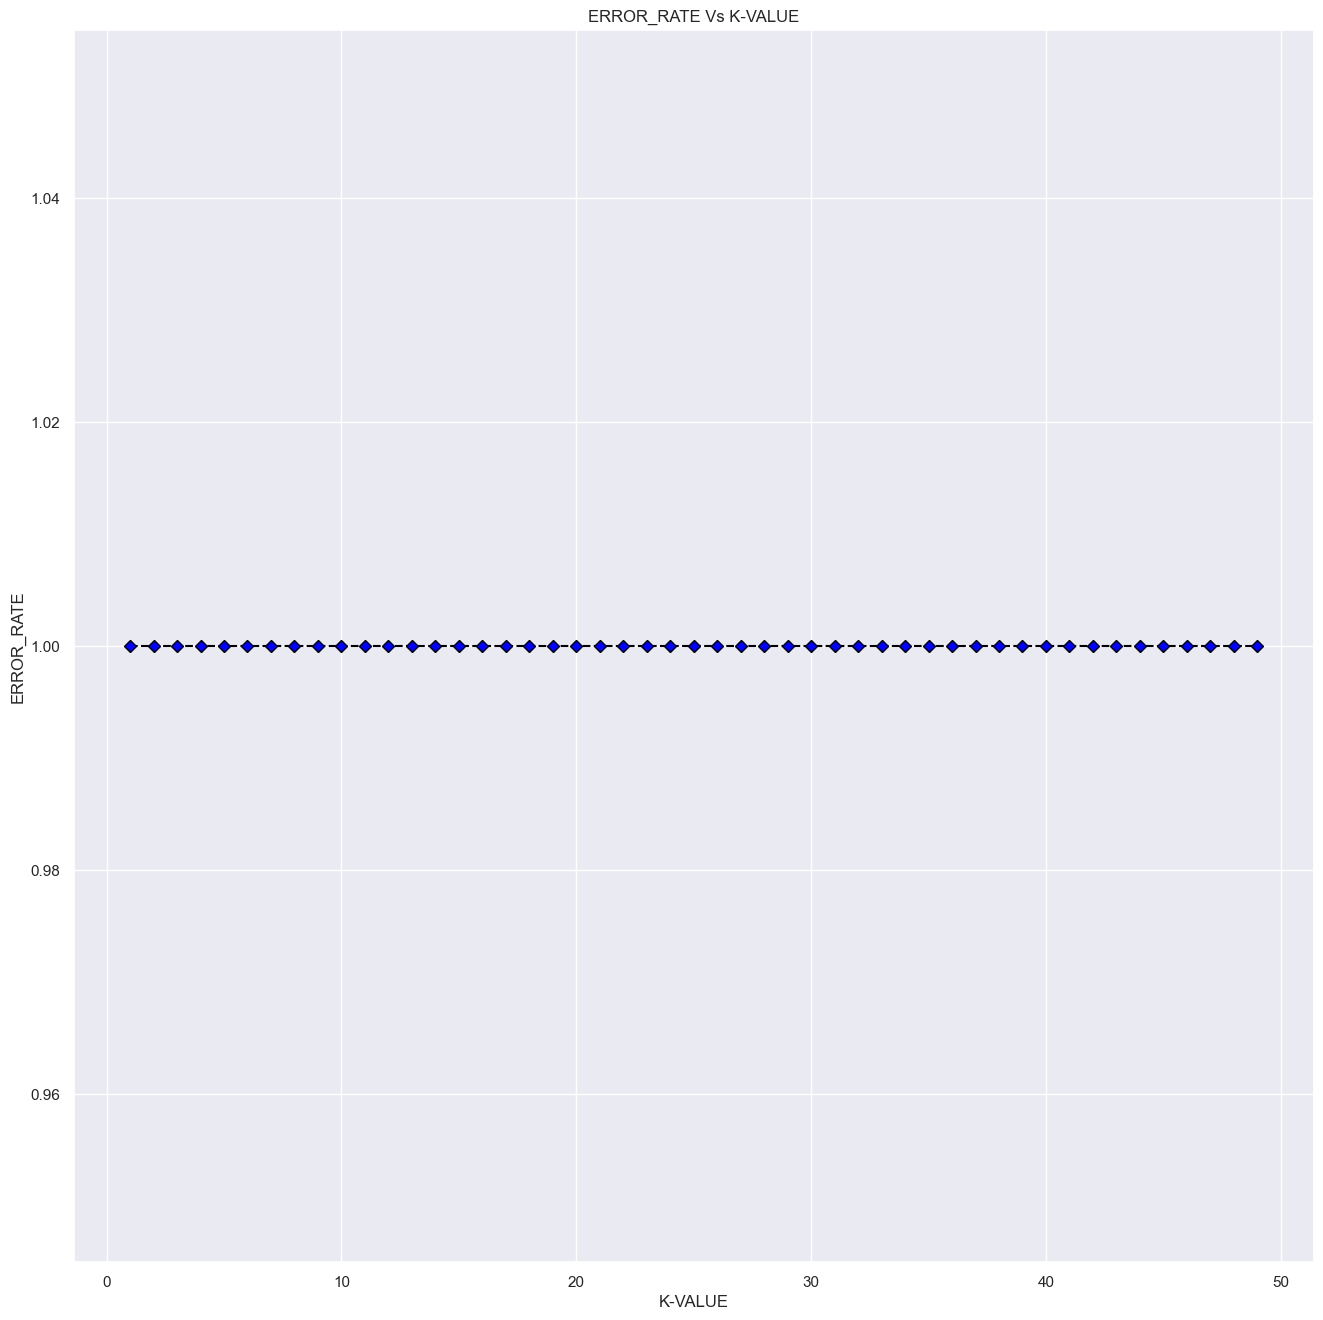

In [112]:
plt.figure(figsize=(16,16))
plt.plot(range(1,50),error_rate,color='black',linestyle='dashed',marker='D',markerfacecolor='blue')
plt.title('ERROR_RATE Vs K-VALUE')
plt.xlabel('K-VALUE')
plt.ylabel('ERROR_RATE')
plt.show()

In [162]:
param_grid={'n_neighbors':[10,11,18,27,48],
           'weights':['uniform'],
           'algorithm':['auto'],
          'leaf_size':[30,50],
           'p':[2,1],
          'metric':['minkowski']
           }
grid=GridSearchCV(KNeighborsRegressor(),param_grid,refit=True)
grid.fit(x_train,y_train)
knn_grid_pred_train=grid.predict(x_train)
knn_grid_pred_test=grid.predict(x_test)
Train_acc = r2_score(y_train, knn_grid_pred_train)
Test_acc = r2_score(y_test, knn_grid_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc)
print("Test Accuracy Score :", Test_acc)

Trainging Accuracy Score : 0.8889443163801232
Test Accuracy Score : 0.8670432816750978


In [163]:
from sklearn.metrics import r2_score
print('Accuracy of Train K-NEAREST NEIGHBOR:',r2_score(y_train,knn_grid_pred_train))
print('===============================================================================================')
print('Accuracy of Test K-NEAREST NEIGHBOR:',r2_score(y_test,knn_grid_pred_test))

Accuracy of Train K-NEAREST NEIGHBOR: 0.8889443163801232
Accuracy of Test K-NEAREST NEIGHBOR: 0.8670432816750978


In [165]:
knn_acc=r2_score(y_test, knn_grid_pred_test)
knn_acc_train=r2_score(y_train, knn_grid_pred_train)

# 🎯Support Vector Machine (SVM)

In [166]:
from sklearn.svm import SVR

In [167]:
#kernel=linear
svm_linear=SVR(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred_svm_train=svm_linear.predict(x_train)
y_pred_svm_test=svm_linear.predict(x_test)

In [168]:
print('r2_score train:',r2_score(y_train,y_pred_svm_train))
print()
print('r2_score test:',r2_score(y_test,y_pred_svm_test))

r2_score train: 0.01438543882155019

r2_score test: 0.013753573545542408


In [169]:
#kernel=sigmoidal
svm_sigmoid=SVR(kernel='sigmoid')
svm_sigmoid.fit(x_train,y_train)
y_pred_svm_sigmoid_train=svm_sigmoid.predict(x_train)
y_pred_svm_sigmoid_test=svm_sigmoid.predict(x_test)

In [170]:
print('r2_score train:',r2_score(y_train,y_pred_svm_train))
print()
print('r2_score test:',r2_score(y_test,y_pred_svm_test))

r2_score train: 0.01438543882155019

r2_score test: 0.013753573545542408


In [171]:
#kernel=poly
svm_poly=SVR(kernel='poly')
svm_poly.fit(x_train,y_train)
y_pred_svm_poly_train=svm_poly.predict(x_train)
y_pred_svm_poly_test=svm_poly.predict(x_test)

In [172]:
print('r2_score train:',r2_score(y_train,y_pred_svm_train))
print()
print('r2_score test:',r2_score(y_test,y_pred_svm_test))

r2_score train: 0.01438543882155019

r2_score test: 0.013753573545542408


In [173]:
#rbf(radial basis function)---->by default kernel
svm_rbf=SVR(kernel='rbf')
svm_rbf.fit(x_train,y_train)
y_pred_svm_rbf_train=svm_rbf.predict(x_train)
y_pred_svm_rbf_test=svm_rbf.predict(x_test)

In [174]:
print('r2_score train:',r2_score(y_train,y_pred_svm_train))
print()
print('r2_score test:',r2_score(y_test,y_pred_svm_test))

r2_score train: 0.01438543882155019

r2_score test: 0.013753573545542408


In [175]:
print('Accuracy of Train SVM:',r2_score(y_train,y_pred_svm_train))
print('===============================================================================================')
print('Accuracy of Test SVM:',r2_score(y_test,y_pred_svm_test))

Accuracy of Train SVM: 0.01438543882155019
Accuracy of Test SVM: 0.013753573545542408


In [179]:
svm_acc=r2_score(y_test,y_pred_svm_test)
svm_acc_train=r2_score(y_train,y_pred_svm_train)

# 🎯BOOSTING :

In [125]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [126]:
!pip install Xgboost

In [127]:
adaboost=AdaBoostRegressor()
adb=adaboost.fit(x_train,y_train)
y_pred_adb_train=adb.predict(x_train)
y_pred_adb_test=adb.predict(x_test)
print('Train accuracy:',r2_score(y_train,y_pred_adb_train))
print('Test accuracy:',r2_score(y_test,y_pred_adb_test))

Train accuracy: 0.8355248976947501
Test accuracy: 0.808800022443173


In [128]:
gdboost=GradientBoostingRegressor()
gdb=gdboost.fit(x_train,y_train)
y_pred_gdb_train=gdb.predict(x_train)
y_pred_gdb_test=gdb.predict(x_test)
print('Train accuracy:',r2_score(y_train,y_pred_gdb_train))
print('Test accuracy:',r2_score(y_test,y_pred_gdb_test))

Train accuracy: 0.9294563421699312
Test accuracy: 0.8985434183460274


In [129]:
from xgboost import XGBRegressor

In [130]:
xgboost=XGBRegressor()
xgb=xgboost.fit(x_train,y_train)
y_pred_xgb_train=xgb.predict(x_train)
y_pred_xgb_test=xgb.predict(x_test)
print('Train accuracy:',r2_score(y_train,y_pred_xgb_train))
print('Test accuracy:',r2_score(y_test,y_pred_xgb_test))

Train accuracy: 0.9810205777970976
Test accuracy: 0.8751266587058342


In [131]:
print('Accuracy of Train Boosting:',r2_score(y_train,y_pred_gdb_train))
print('===============================================================================================')
print('Accuracy of Test Boosting:',r2_score(y_test,y_pred_gdb_test))

Accuracy of Train Boosting: 0.9294563421699312
Accuracy of Test Boosting: 0.8985434183460274


In [178]:
gdb_acc=r2_score(y_test,y_pred_gdb_test)
gdb_acc_train=r2_score(y_train,y_pred_gdb_train)

# 🎯SUMMARY

In [180]:
model=['logistic','decisiontree','bagging','randomforest','KNN','SVM','Gradient Boost']
Test_Accuracy=[logit_acc,dtree_acc,bagg_acc,rf_acc,knn_acc,svm_acc,gdb_acc]
Train_Accuracy=[logit_acc_train,dtree_acc_train,bagg_acc_train,rf_acc_train,knn_acc_train,svm_acc_train,gdb_acc_train]

In [181]:
metrics_df=pd.DataFrame({'model_name':model,'Train_Accuracy':Train_Accuracy,'Test_Accuracy':Test_Accuracy})

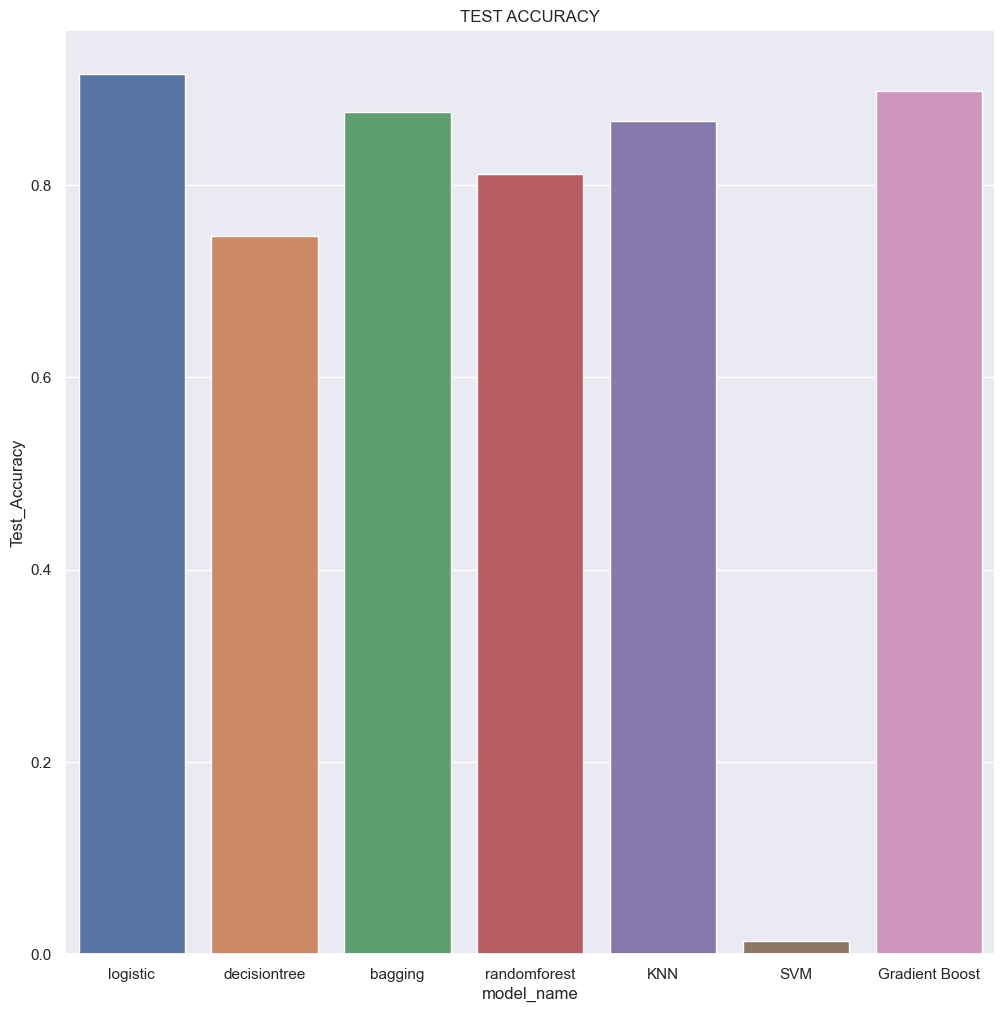

In [182]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Test_Accuracy',data=metrics_df)
plt.title('TEST ACCURACY')
plt.show()

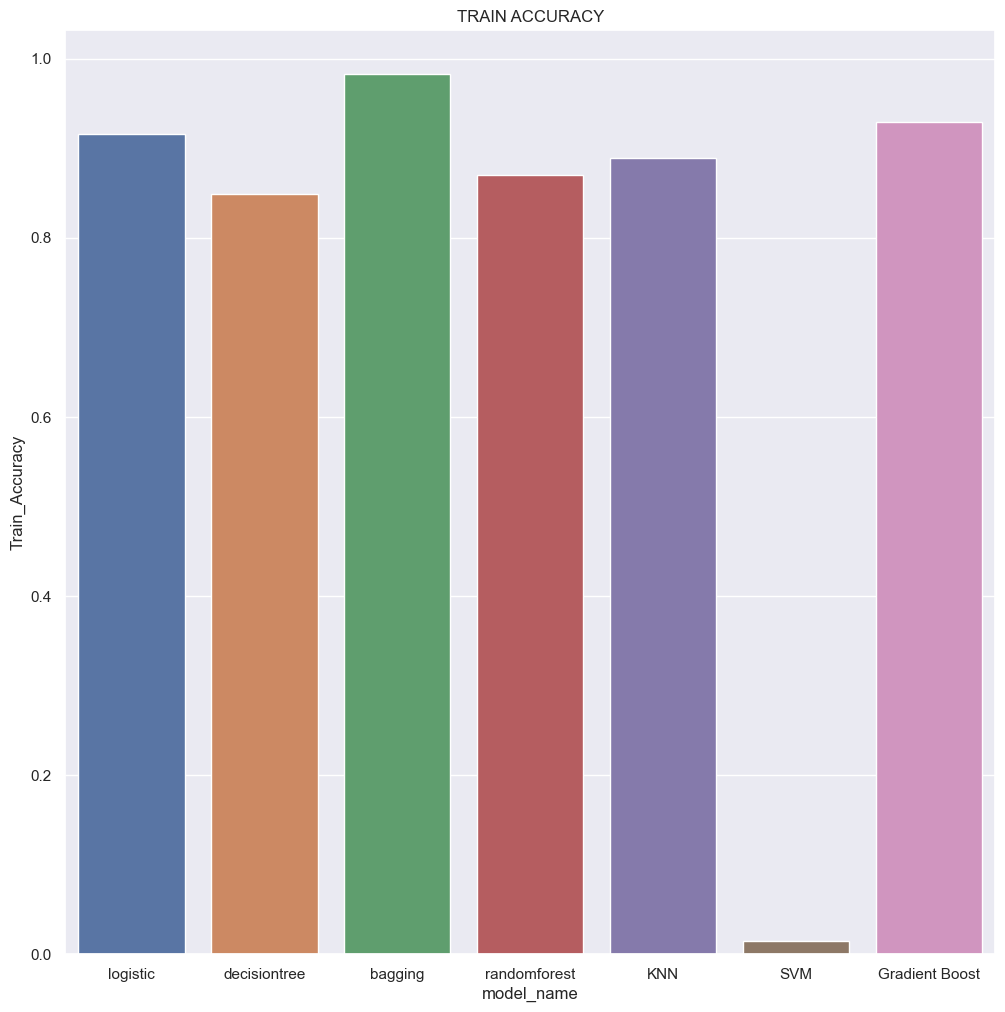

In [183]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Train_Accuracy',data=metrics_df)
plt.title('TRAIN ACCURACY')
plt.show()

In [184]:
metrics_df

model_name  Train_Accuracy  Test_Accuracy
0        logistic        0.915839       0.915670
1    decisiontree        0.848961       0.746655
2         bagging        0.982700       0.876386
3    randomforest        0.870275       0.811375
4             KNN        0.888944       0.867043
5             SVM        0.014385       0.013754
6  Gradient Boost        0.929456       0.898543

#### We can observe that Logistic Regression,Random forest,KNN,Gradient Boosting are delivering appreciable test accuracies and train accuracies

In [188]:
logit_var=abs(logit_acc-logit_acc_train)
knn_var=abs(knn_acc-knn_acc_train)
gdb_var=abs(gdb_acc-gdb_acc_train)
rf_var=abs(rf_acc-rf_acc_train)

In [189]:
print('LOGISTIC REGRESSION')
print('===========================================================')
print('TRAIN ACCURACY:',logit_acc_train)
print('TEST ACCURACY:',logit_acc)
print('VARIENCE:',logit_var)
print('===========================================================')
print('K NEAREST NEIGHBOR')
print('===========================================================')
print('TRAIN ACCURACY:',knn_acc_train)
print('TEST ACCURACY:',knn_acc)
print('VARIENCE:',knn_var)
print('===========================================================')
print('GRADIENT BOOST')
print('===========================================================')
print('TRAIN ACCURACY:',gdb_acc_train)
print('TEST ACCURACY:',gdb_acc)
print('VARIENCE:',gdb_var)
print('===========================================================')
print('RANDOM FOREST')
print('===========================================================')
print('TRAIN ACCURACY:',rf_acc_train)
print('TEST ACCURACY:',rf_acc)
print('VARIENCE:',rf_var)

LOGISTIC REGRESSION
TRAIN ACCURACY: 0.915838657450251
TEST ACCURACY: 0.9156697910198243
VARIENCE: 0.00016886643042668403
K NEAREST NEIGHBOR
TRAIN ACCURACY: 0.8889443163801232
TEST ACCURACY: 0.8670432816750978
VARIENCE: 0.021901034705025357
GRADIENT BOOST
TRAIN ACCURACY: 0.9294563421699312
TEST ACCURACY: 0.8985434183460274
VARIENCE: 0.03091292382390387
RANDOM FOREST
TRAIN ACCURACY: 0.8702751356870114
TEST ACCURACY: 0.811374687947274
VARIENCE: 0.05890044773973746


#### When we compare all the best 4 models with their test and test accuracies and varience,the 'ADA BOOST' is delivering better Train and Test Accuracy and little Varience